In [276]:
import pandas as pd
import sweetviz as sv
import missingno as msno
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler

# Lecture des csv



## Customers


In [128]:
df_customer = pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_customers_dataset.csv')

In [129]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [130]:
frequency = df_customer["customer_unique_id"].value_counts()
df_customer["frequency"] = df_customer["customer_unique_id"].map(frequency)

<AxesSubplot:>

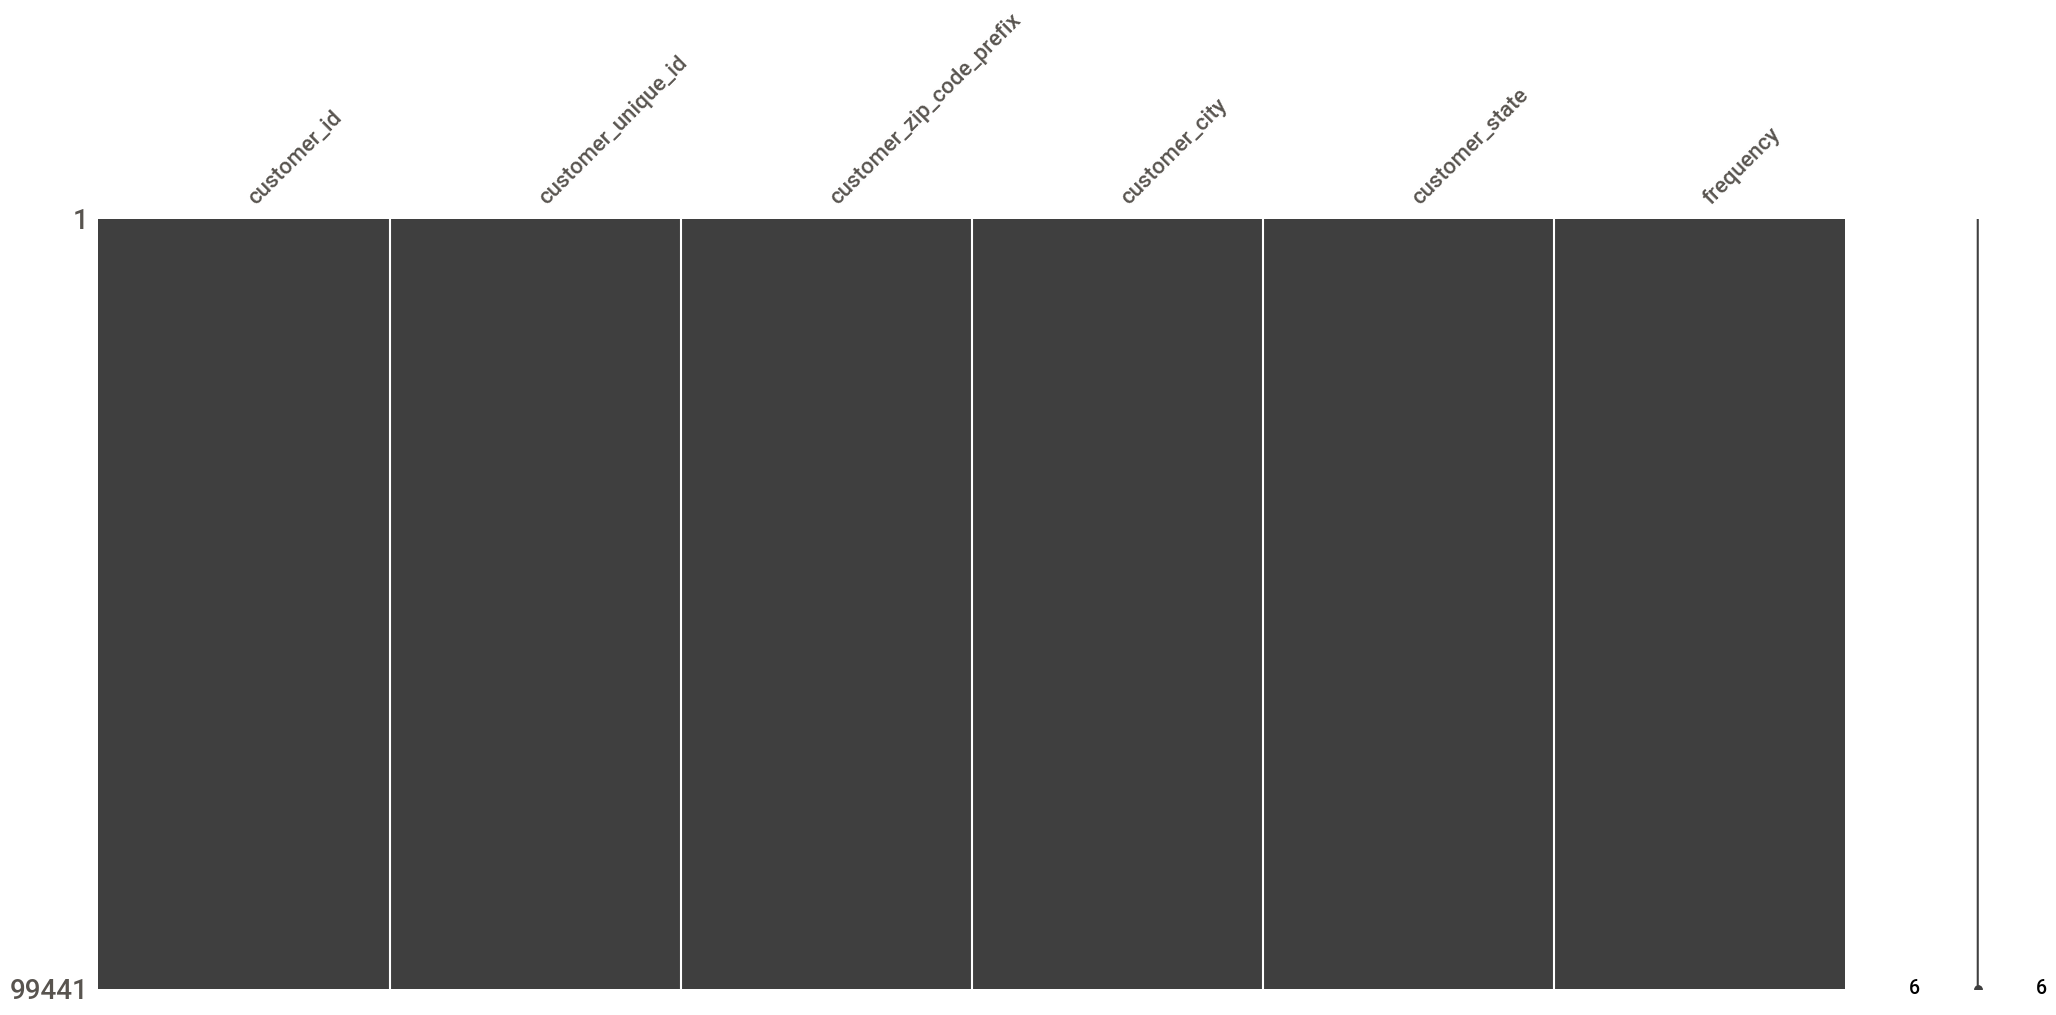

In [131]:
msno.matrix(df_customer)

In [132]:
columns_to_drop = [ "customer_city"]
df_customer = df_customer.drop(columns = columns_to_drop)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,frequency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,SP,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,SP,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,SP,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,SP,1


In [133]:
missing_values_count = df_customer.isnull().sum()
missing_values_count

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_state              0
frequency                   0
dtype: int64

In [134]:
df_customer.shape

(99441, 5)

In [135]:
df_customer["customer_id"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Name: customer_id, Length: 99441, dtype: bool

In [136]:
report = sv.analyze(df_customer)
report.show_html('report_customer.html')

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: customer_id                         |█▋        | [ 17%]   00:00 -> (00:00 left)/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: custome

Report report_customer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Geolocation

In [137]:
df_geolocation = pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_geolocation_dataset.csv')

In [138]:
df_geolocation = df_geolocation.drop(columns="geolocation_state")

In [139]:
df_geolocation.shape

(1000163, 4)

In [140]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1037,-23.545621,-46.639292,sao paulo
1,1046,-23.546081,-46.644820,sao paulo
2,1046,-23.546129,-46.642951,sao paulo
3,1041,-23.544392,-46.639499,sao paulo
4,1035,-23.541578,-46.641607,sao paulo


In [141]:
df_geolocation = df_geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat': 'mean', 'geolocation_lng': 'mean', 'geolocation_city': 'first'})
df_geolocation = df_geolocation.reset_index()
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1001,-23.550190,-46.634024,sao paulo
1,1002,-23.548146,-46.634979,sao paulo
2,1003,-23.548994,-46.635731,sao paulo
3,1004,-23.549799,-46.634757,sao paulo
4,1005,-23.549456,-46.636733,sao paulo
...,...,...,...,...
19010,99960,-27.953722,-52.025511,charrua
19011,99965,-28.183372,-52.039850,agua santa
19012,99970,-28.343766,-51.874689,ciriaco
19013,99980,-28.389129,-51.843836,david canabarro


<AxesSubplot:>

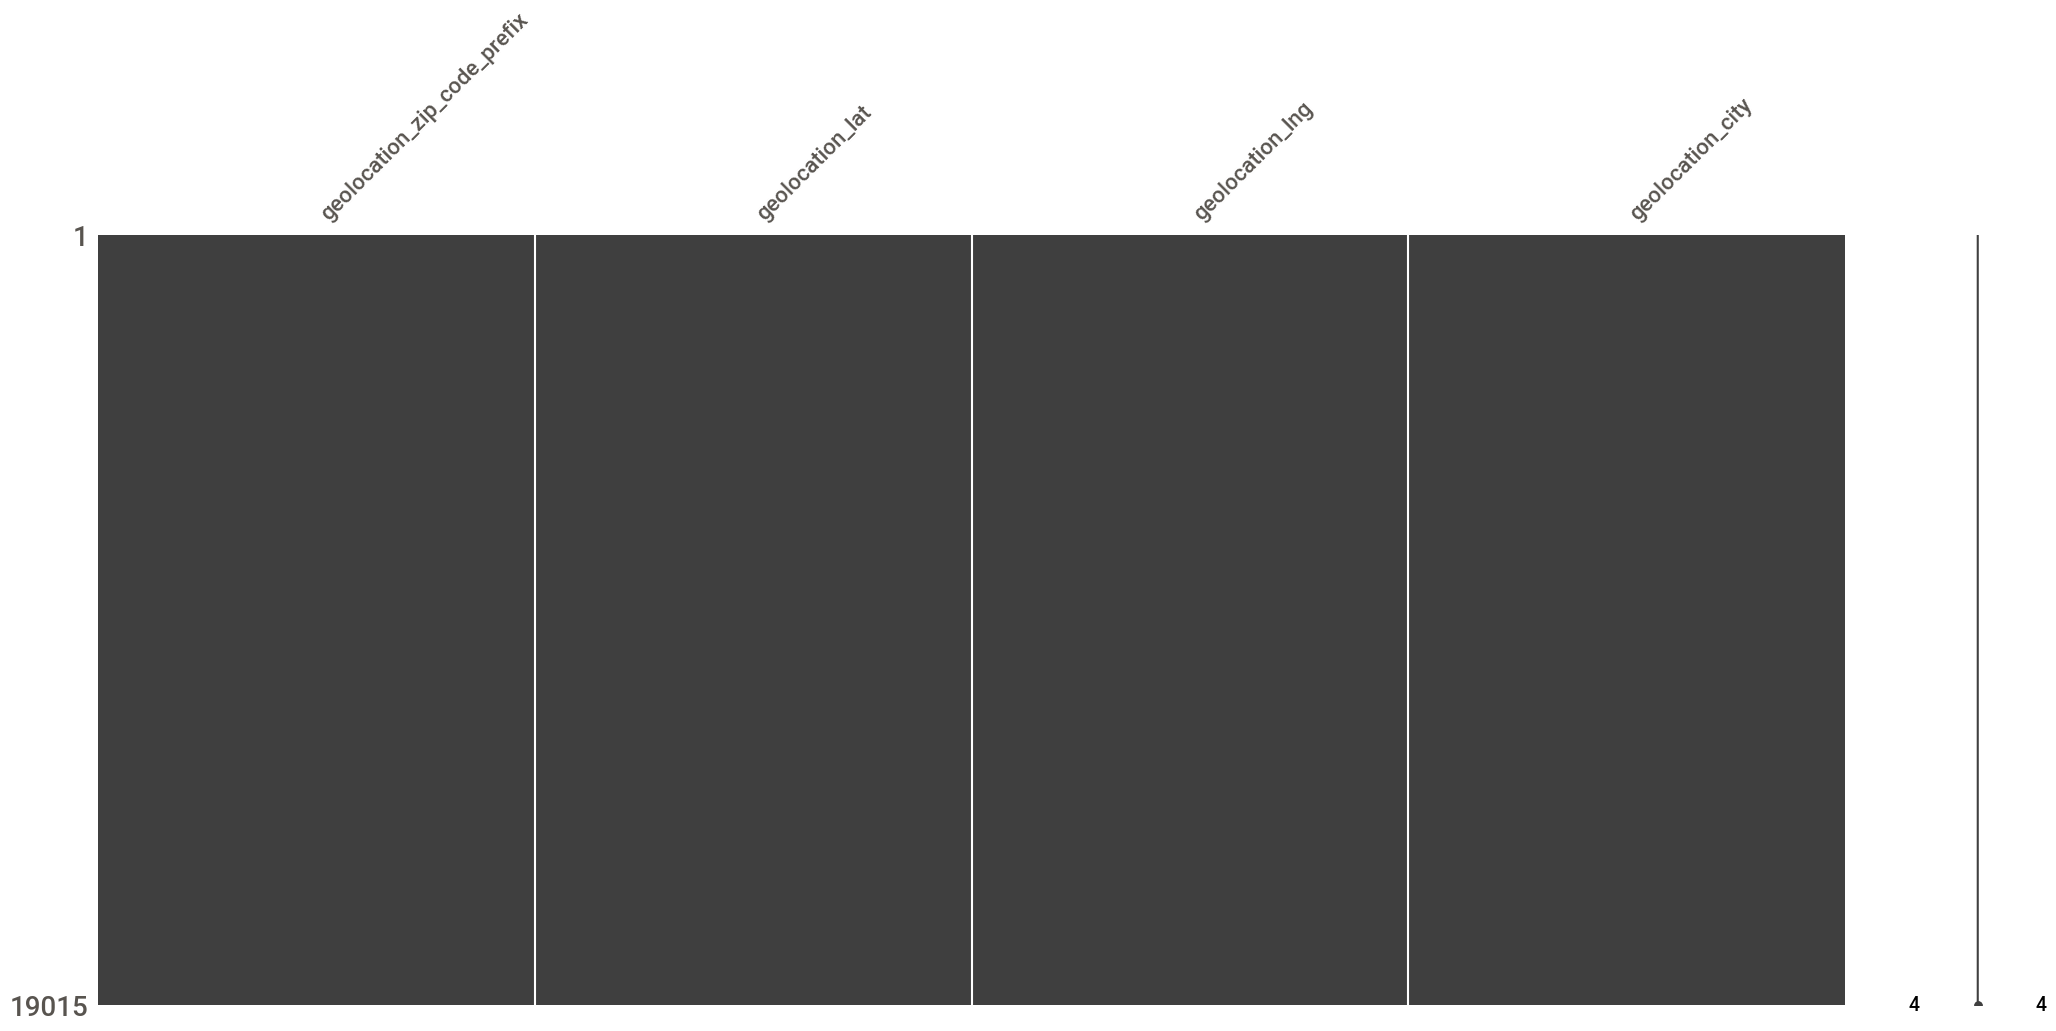

In [142]:
msno.matrix(df_geolocation)


## merge entre customer et geolocation

In [143]:
df_merged = pd.merge(df_customer, df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
# customers_dataset_merged_with_geo = df_customer.merge(geolocation_dataset_without_duplicates_in_zip[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
#                                      left_on='customer_zip_code_prefix', 
#                                      right_on='geolocation_zip_code_prefix', 
#                                      how='left')


In [144]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_state               99441 non-null  object 
 4   frequency                    99441 non-null  int64  
 5   geolocation_zip_code_prefix  99163 non-null  float64
 6   geolocation_lat              99163 non-null  float64
 7   geolocation_lng              99163 non-null  float64
 8   geolocation_city             99163 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 7.6+ MB


In [145]:
df_merged.shape

(99441, 9)

In [146]:
missing_values_count = df_merged.isnull().sum()
missing_values_count

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_state                   0
frequency                        0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
geolocation_city               278
dtype: int64

In [147]:
df_merged = df_merged.dropna()

In [148]:
# import folium


# # Créer une carte en utilisant les coordonnées comme centre de la carte
# map = folium.Map(location=[df_merged["geolocation_lat"].mean(), df_merged["geolocation_lng"].mean()], zoom_start=13)

# # Pour chaque ligne dans le DataFrame, ajouter un marqueur à la carte
# for index, row in df_merged.iterrows():
#     folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]], popup="Emplacement {}".format(index)).add_to(map)

# # Afficher la carte
# map.save("map.html")


In [149]:
import json 

with open('brazil_geo.json') as f:
   geo= json.load(f)

In [150]:
# import folium
# from folium.plugins import MarkerCluster


# def add_marker(row):
#     folium.Marker(location=[row["geolocation_lat"], row["geolocation_lng"]], popup="Emplacement {}".format(row.name)).add_to(marker_cluster)

# # Créer une carte en utilisant les coordonnées comme centre de la carte
# map = folium.Map(location=[df_merged["geolocation_lat"].mean(), df_merged["geolocation_lng"].mean()], zoom_start=13)

# # Créer un cluster de marqueurs
# marker_cluster = MarkerCluster().add_to(map)
# folium.TileLayer('stamentoner').add_to(map) # Sets Tile Theme to (Dark Theme)
# folium.Choropleth(geo_data = geo).add_to(map)

# # Ajouter des marqueurs au cluster en utilisant apply
# df_merged.apply(add_marker, axis=1)

# # Afficher la carte
# map.save("map.html")


In [151]:
# # Stamen Terrain
# map = folium.Map(location=[23.54562128115268, -46.63929204800168 ], tiles="Stamen Terrain", zoom_start=9)
# map

## order items

In [152]:
df_order_items= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_items_dataset.csv')

In [153]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [154]:
df_order_items["order_item_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [155]:
df_order_items = df_order_items.drop(columns = "shipping_limit_date")
df_order_items

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


<AxesSubplot:>

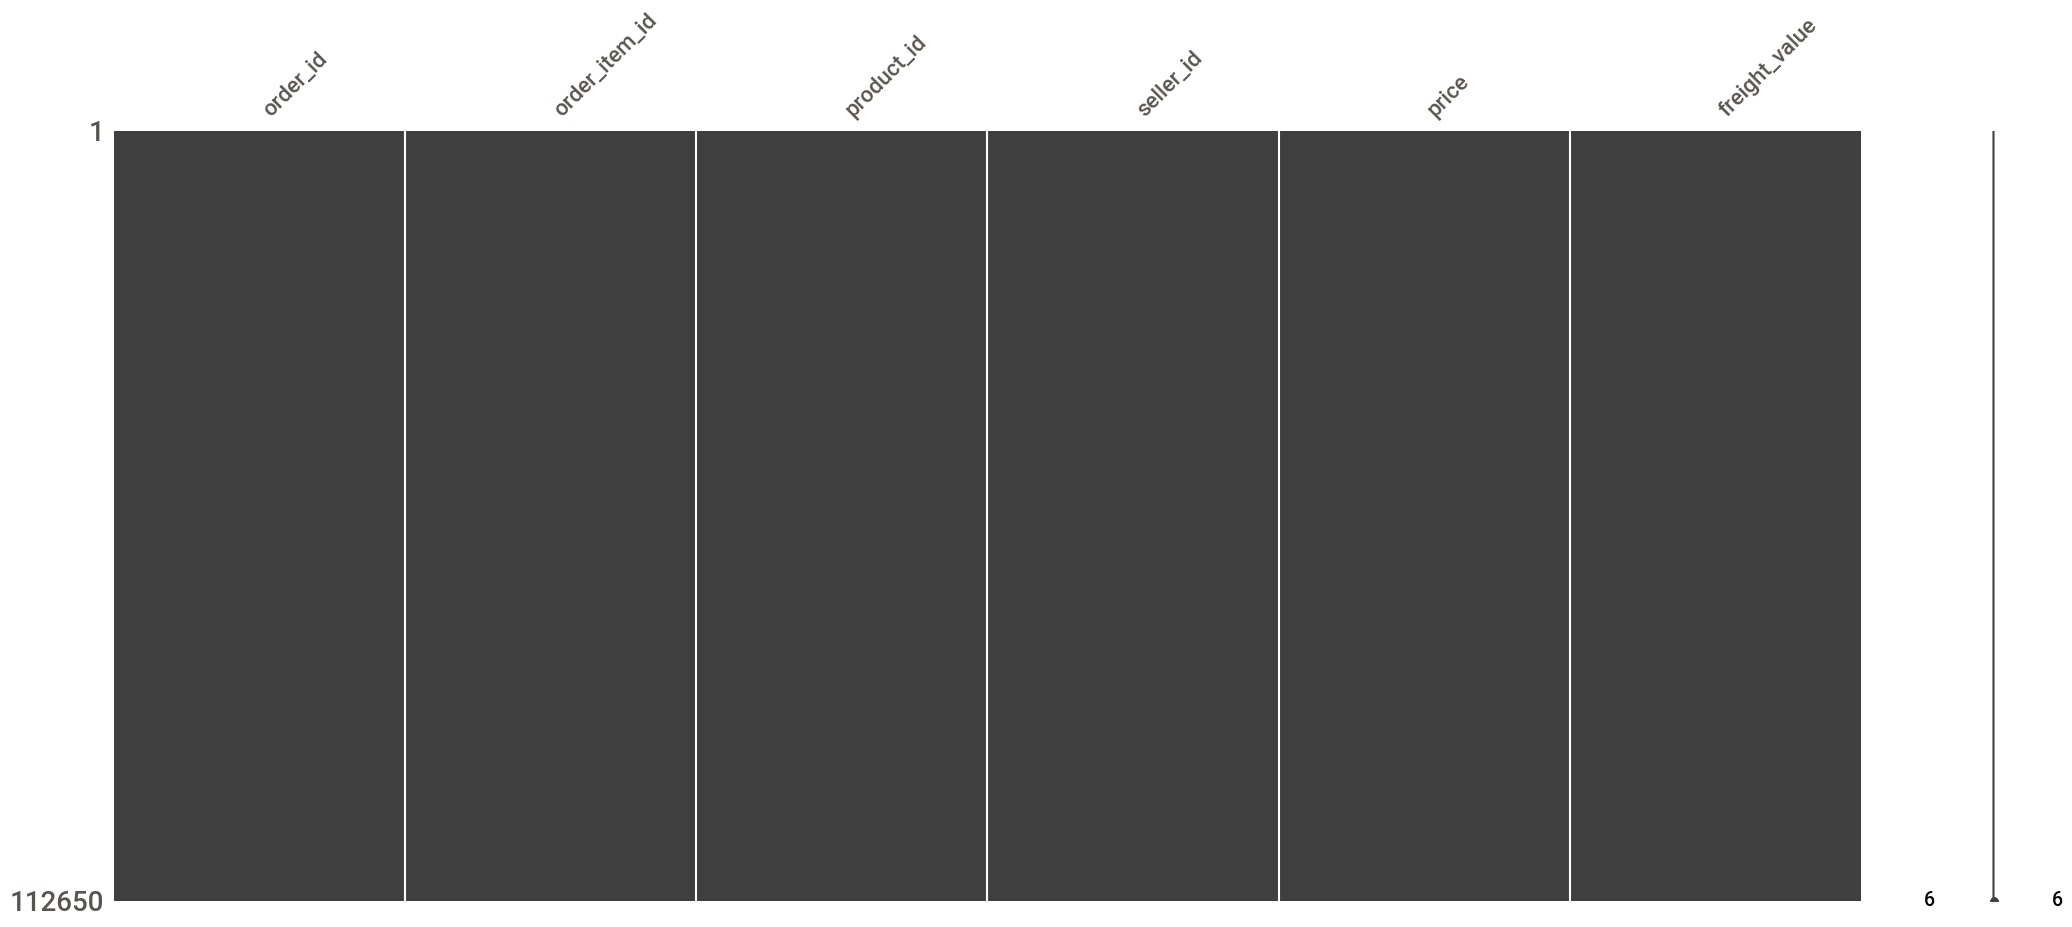

In [156]:
msno.matrix(df_order_items)


In [157]:
# report = sv.analyze(df_order_items)
# report.show_html('report_order_items.html')

## order payements

In [158]:
df_order_payements= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_payments_dataset.csv')

In [159]:
df_order_payements.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [160]:
df_order_payements = df_order_payements.drop(columns="payment_value")


In [161]:
df_order_payements.head()

,order_id,payment_sequential,payment_type,payment_installments
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2


In [162]:
# report = sv.analyze(df_order_payements)
# report.show_html('report_order_payements.html')

<AxesSubplot:>

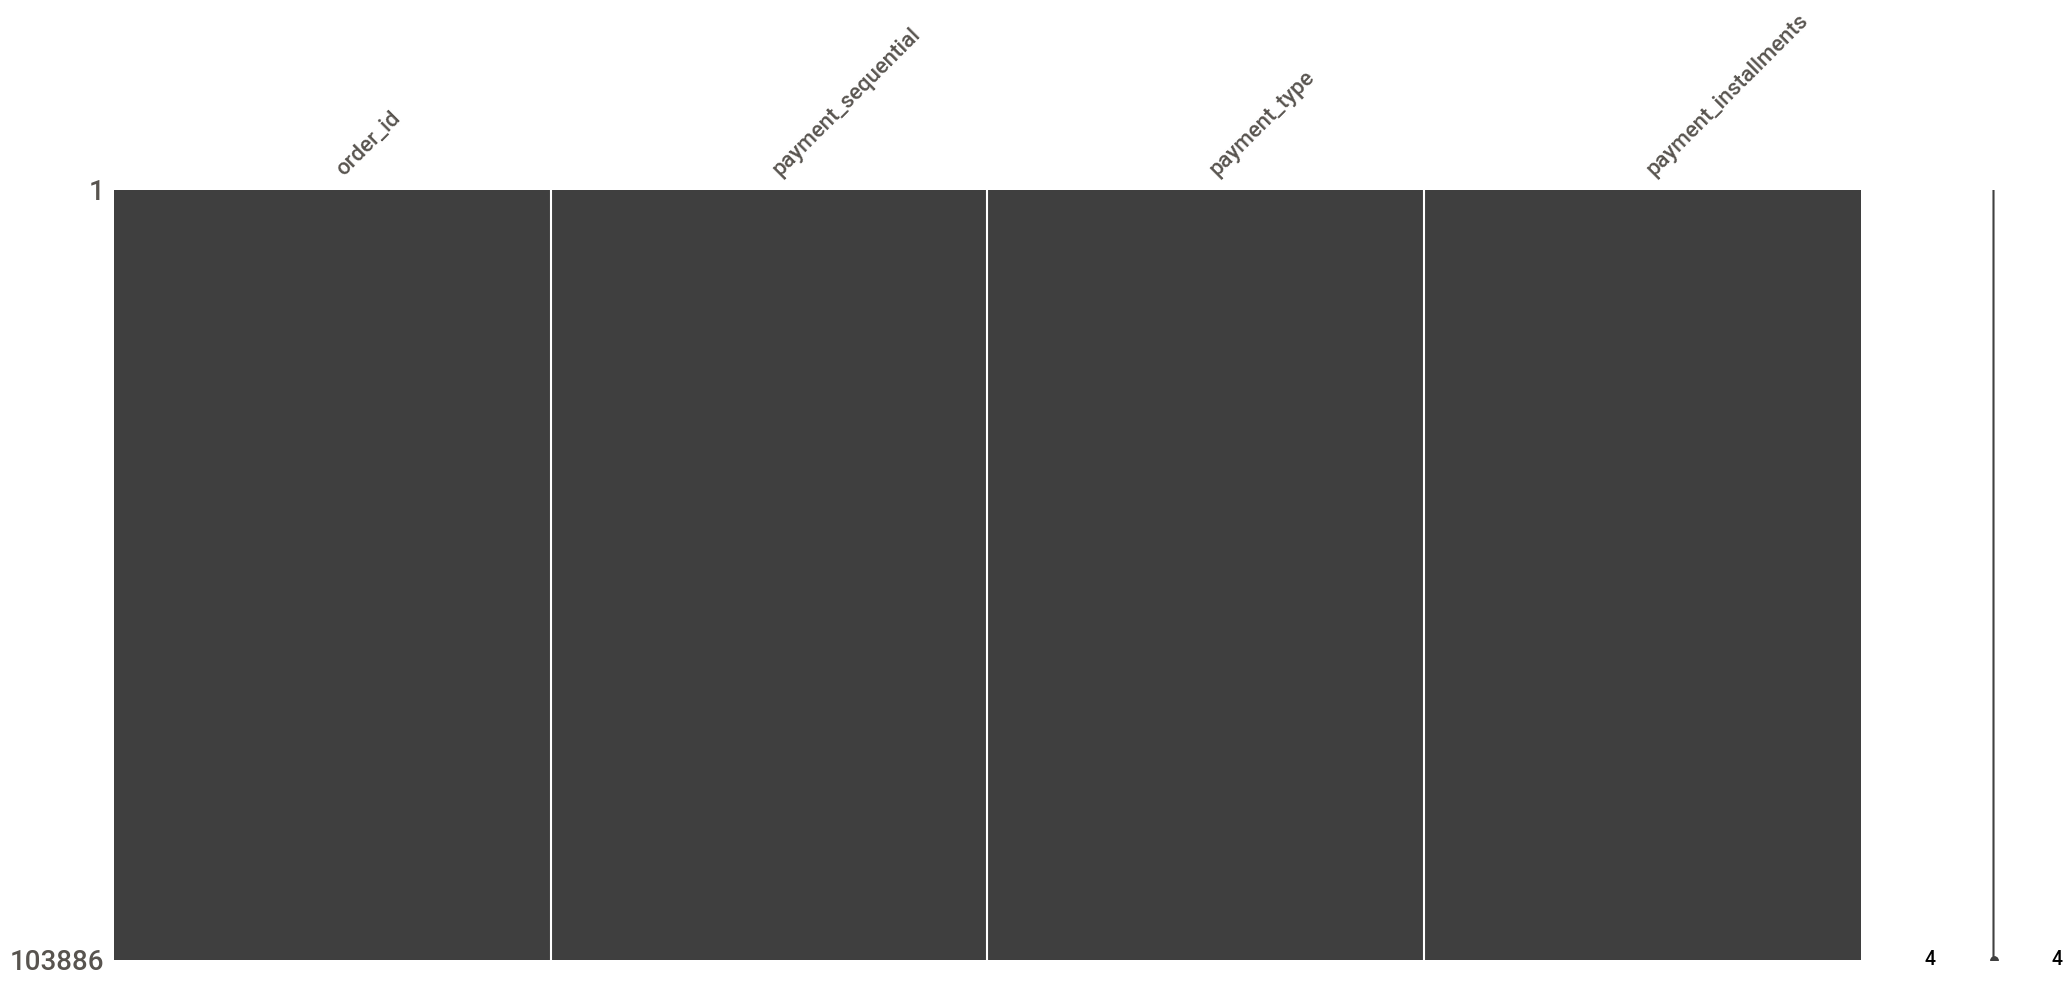

In [163]:
msno.matrix(df_order_payements)


## order reviews 

In [164]:
df_order_reviews= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<AxesSubplot:>

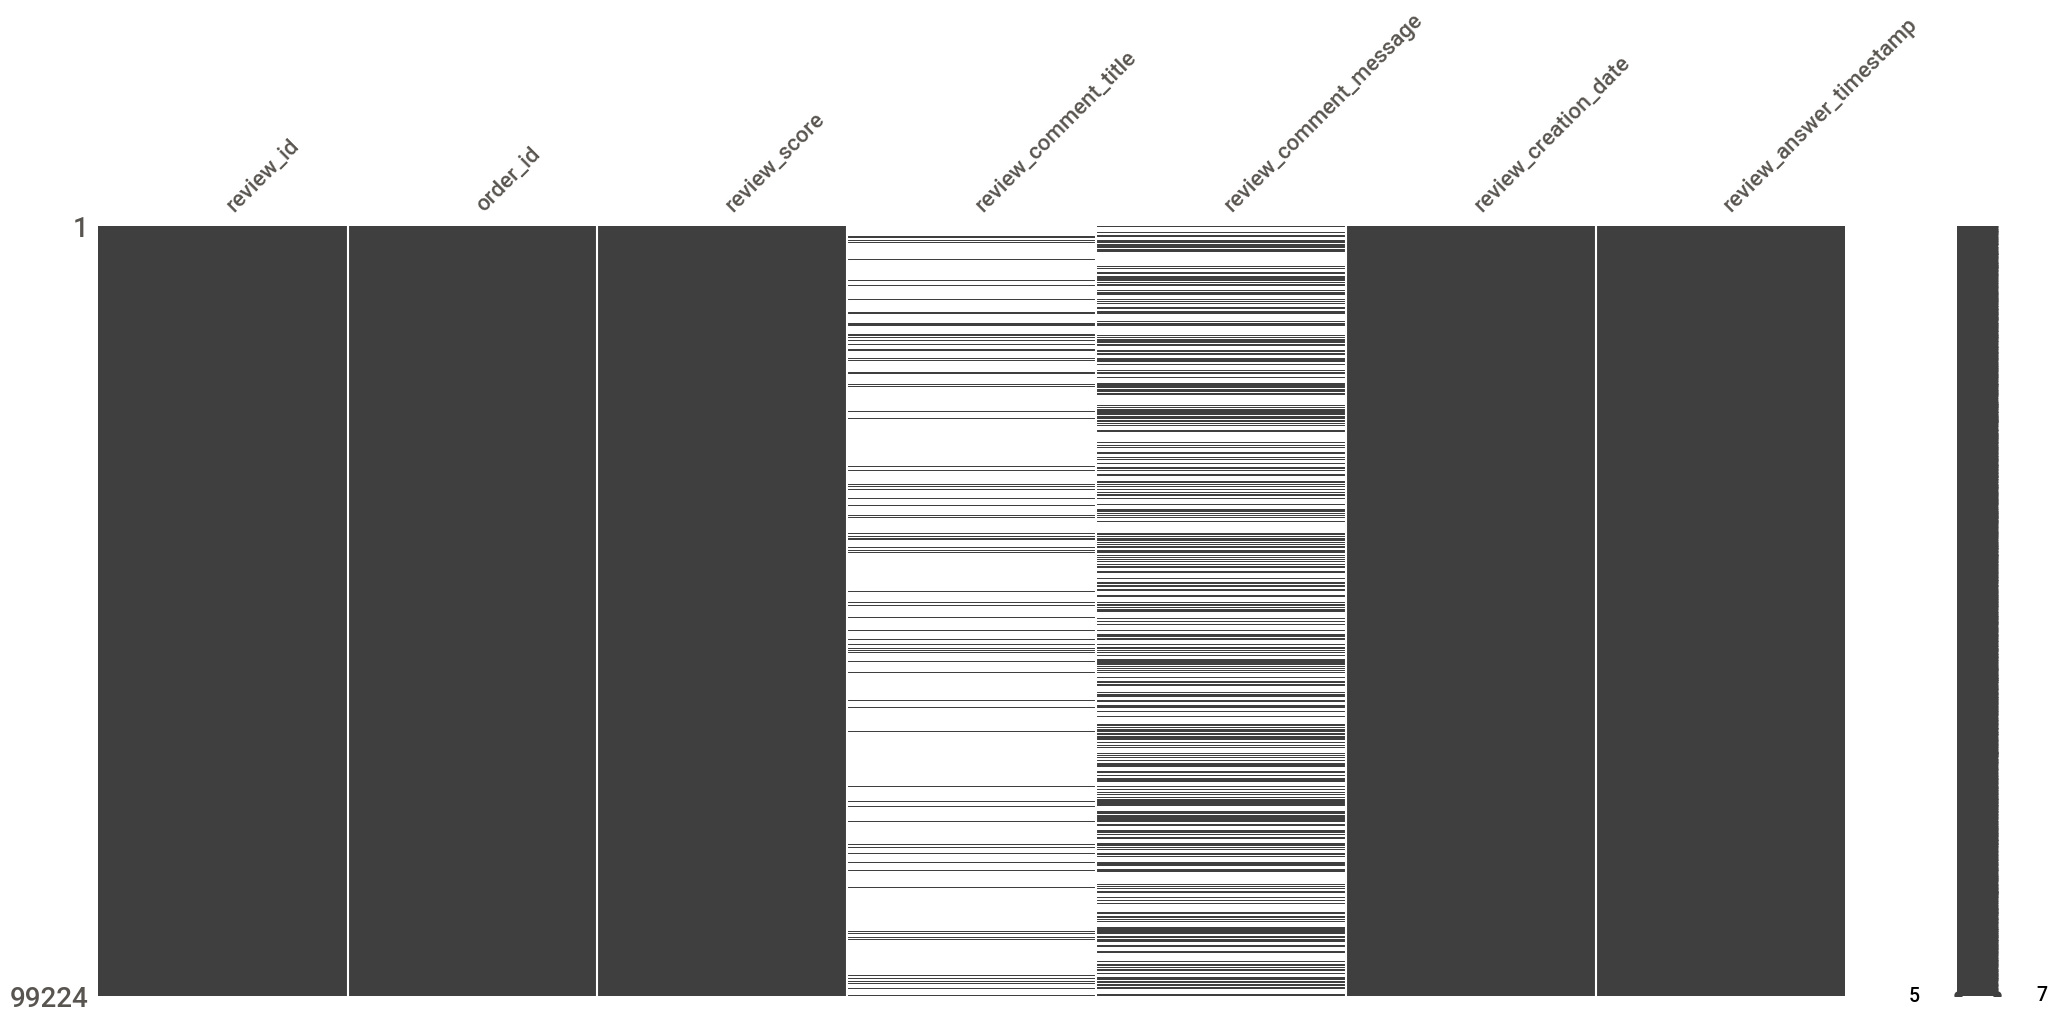

In [165]:
msno.matrix(df_order_reviews)

In [166]:
columstodrop = ["review_comment_title","review_comment_message", "review_creation_date"]
df_order_reviews.drop(columns=columstodrop,  inplace=True)


In [167]:
df_order_reviews["review_answer_timestamp"] = pd.to_datetime(df_order_reviews["review_answer_timestamp"]).dt.strftime('%Y-%m-%d')

In [168]:
df_order_reviews.head()

,review_id,order_id,review_score,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-02


## orders 

In [169]:
df_order= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_orders_dataset.csv')
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [170]:
columns_to_drop= ['order_approved_at',"order_delivered_carrier_date"]
df_order = df_order.drop(columns= columns_to_drop)

In [171]:
df_order.shape

(99441, 6)

<AxesSubplot:>

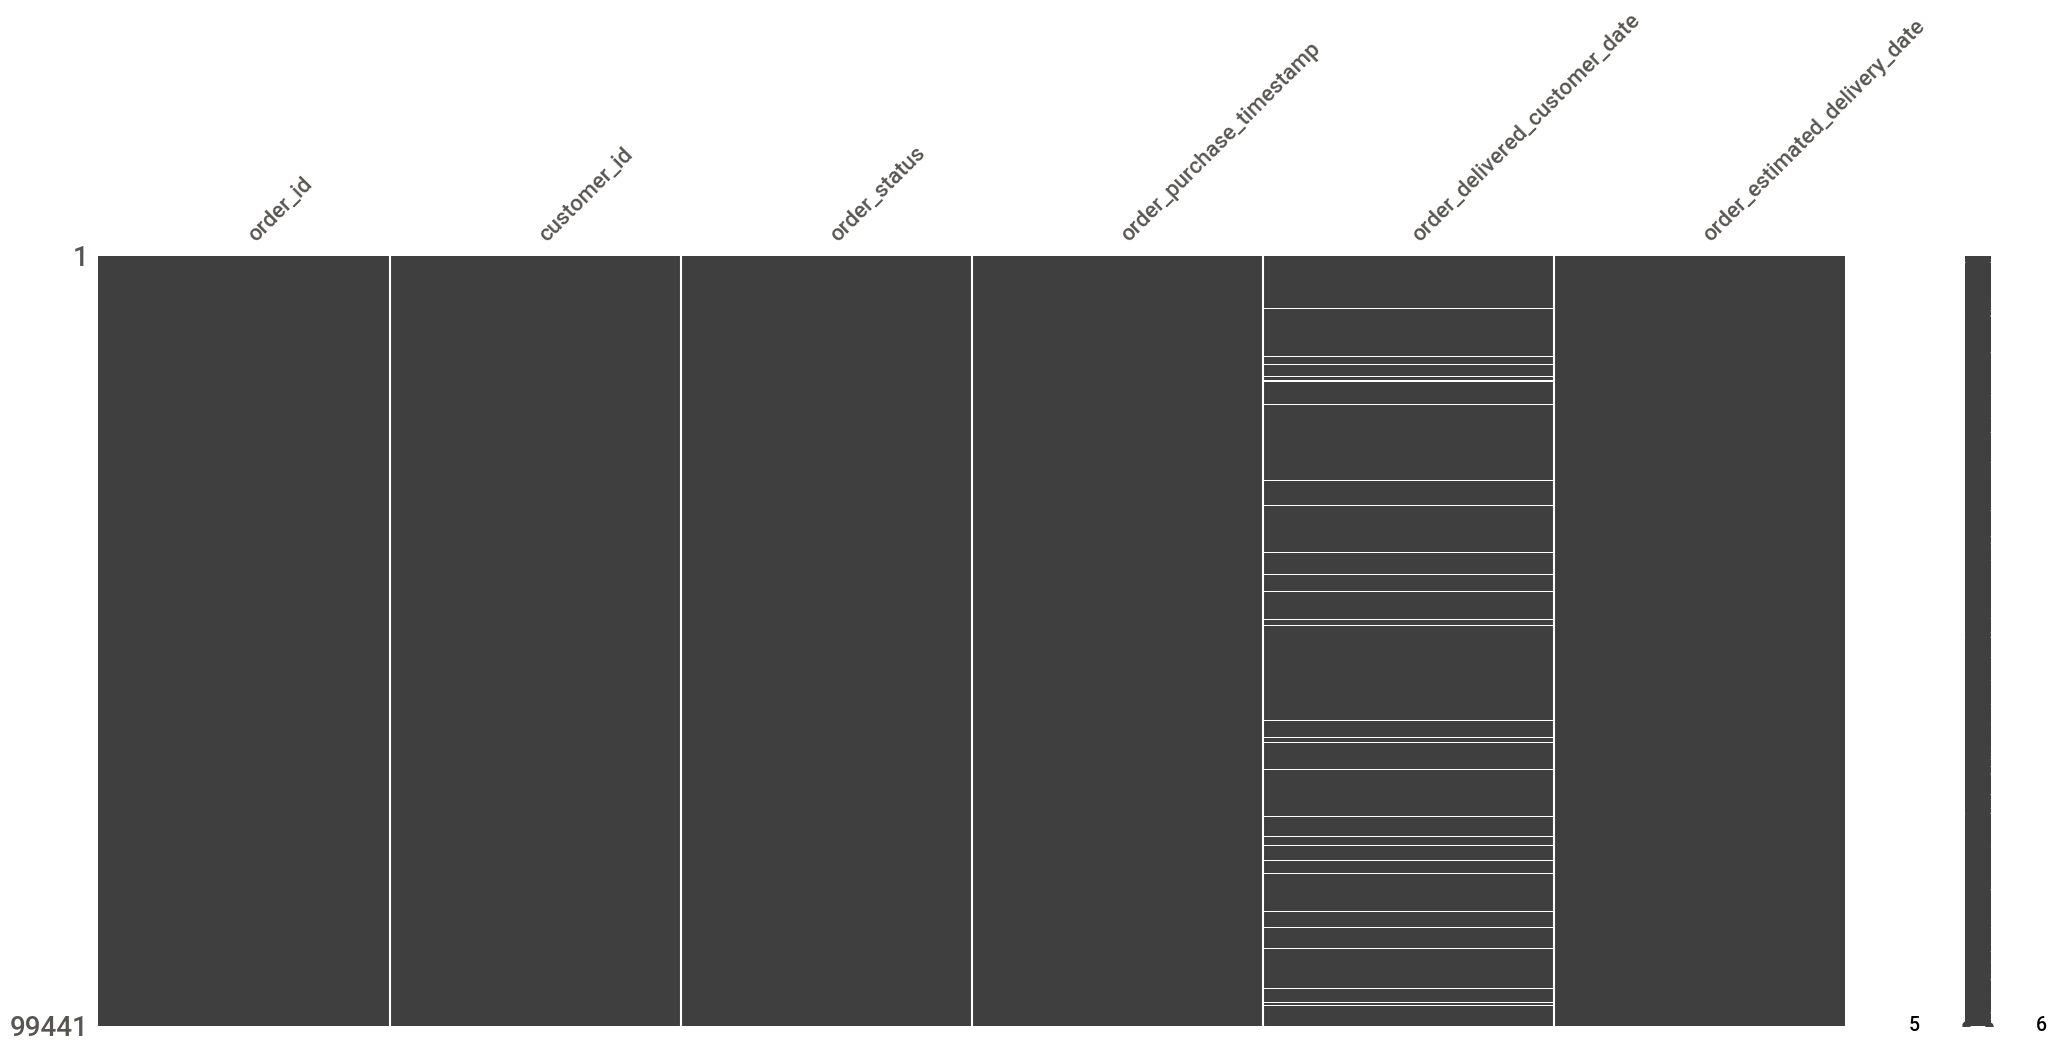

In [172]:
msno.matrix(df_order)


In [173]:
df_order["order_status"].unique

<bound method Series.unique of 0        delivered
1        delivered
2        delivered
3        delivered
4        delivered
           ...    
99436    delivered
99437    delivered
99438    delivered
99439    delivered
99440    delivered
Name: order_status, Length: 99441, dtype: object>

In [174]:
missing_values_count = df_order.isnull().sum()
missing_values_count

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## Products 

In [175]:
df_order_products= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_products_dataset.csv')
df_order_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [176]:
df_order_products = df_order_products[["product_id","product_category_name",]]
df_order_products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


<AxesSubplot:>

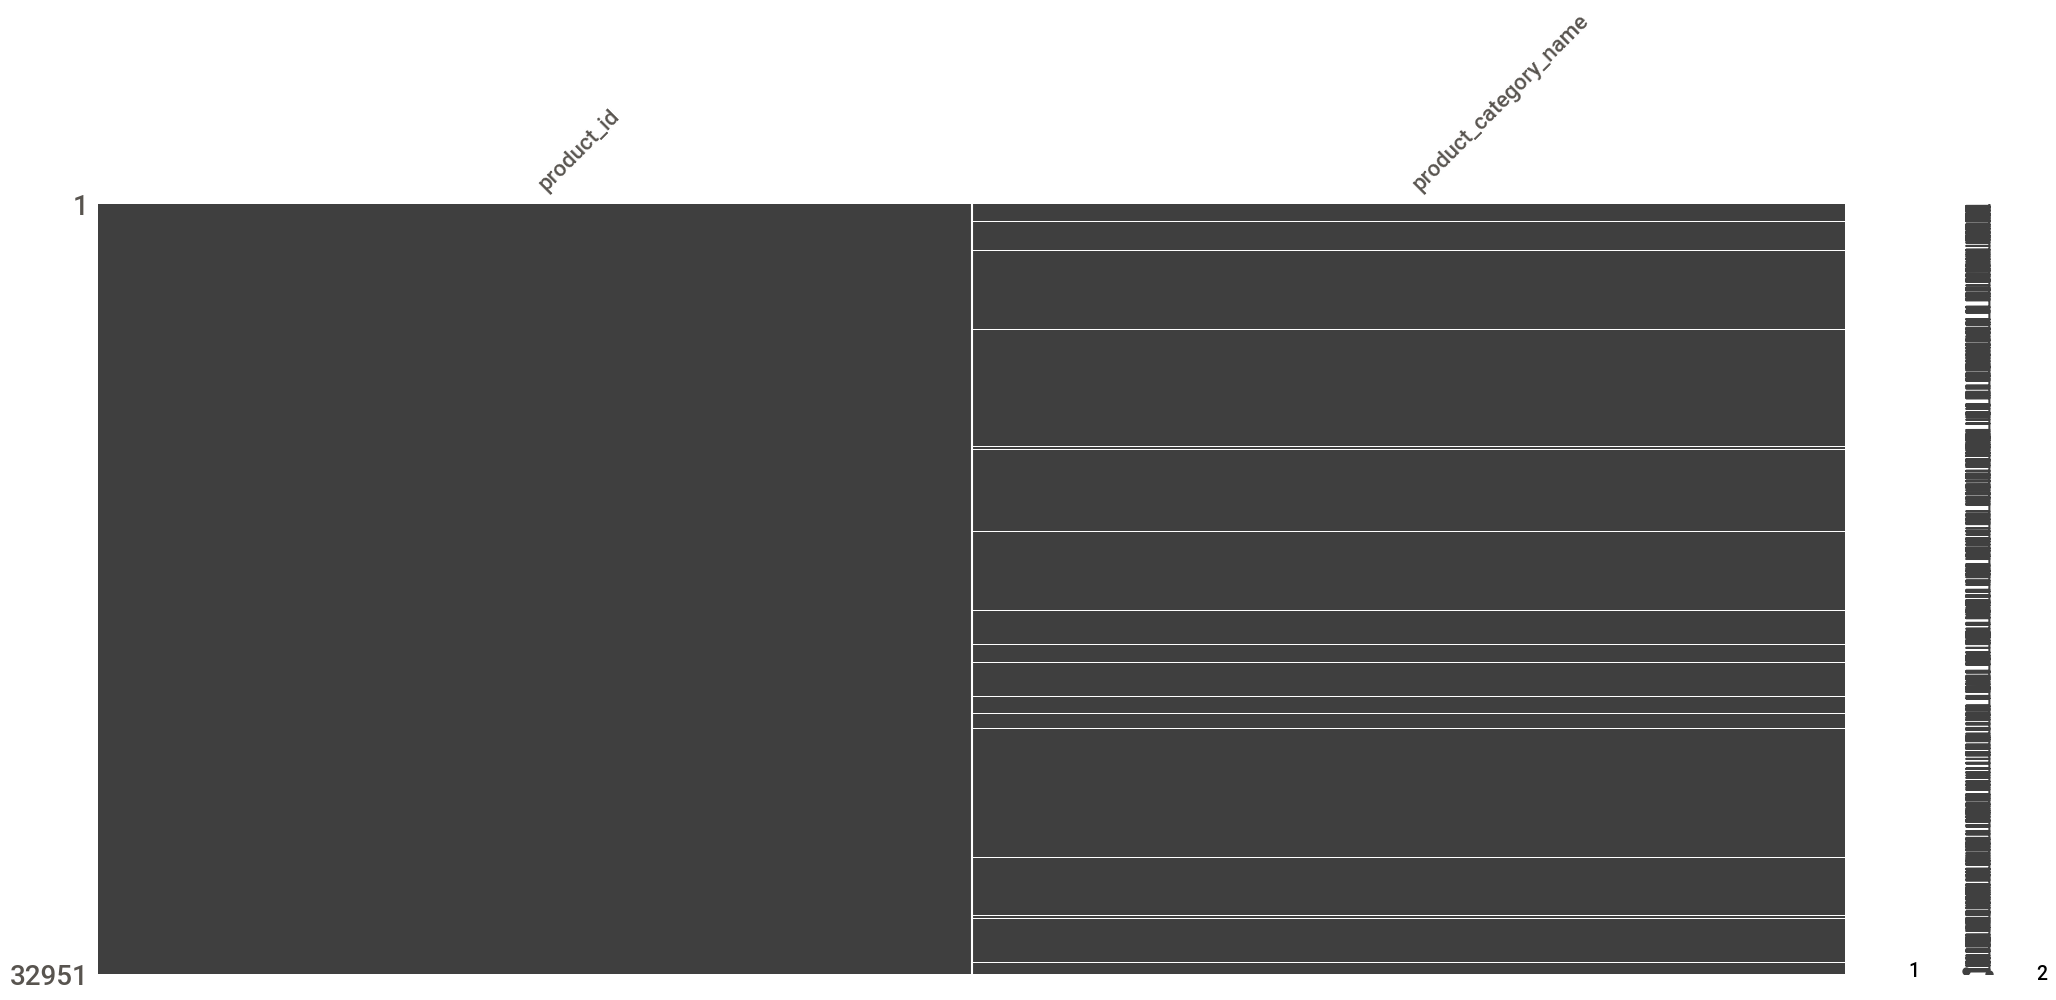

In [177]:
msno.matrix(df_order_products)

In [178]:
missing_values_count = df_order_products.isnull().sum()
missing_values_count

product_id                 0
product_category_name    610
dtype: int64

## Sellers


In [179]:
df_sellers= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/olist_sellers_dataset.csv')

In [180]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [181]:
df_sellers.drop(columns=["seller_city","seller_state"])

,seller_id,seller_zip_code_prefix
0,3442f8959a84dea7ee197c632cb2df15,13023
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195
4,51a04a8a6bdcb23deccc82b0b80742cf,12914
...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111
3091,f8201cab383e484733266d1906e2fdfa,88137
3092,74871d19219c7d518d0090283e03c137,4650
3093,e603cf3fec55f8697c9059638d6c8eb5,96080


<AxesSubplot:>

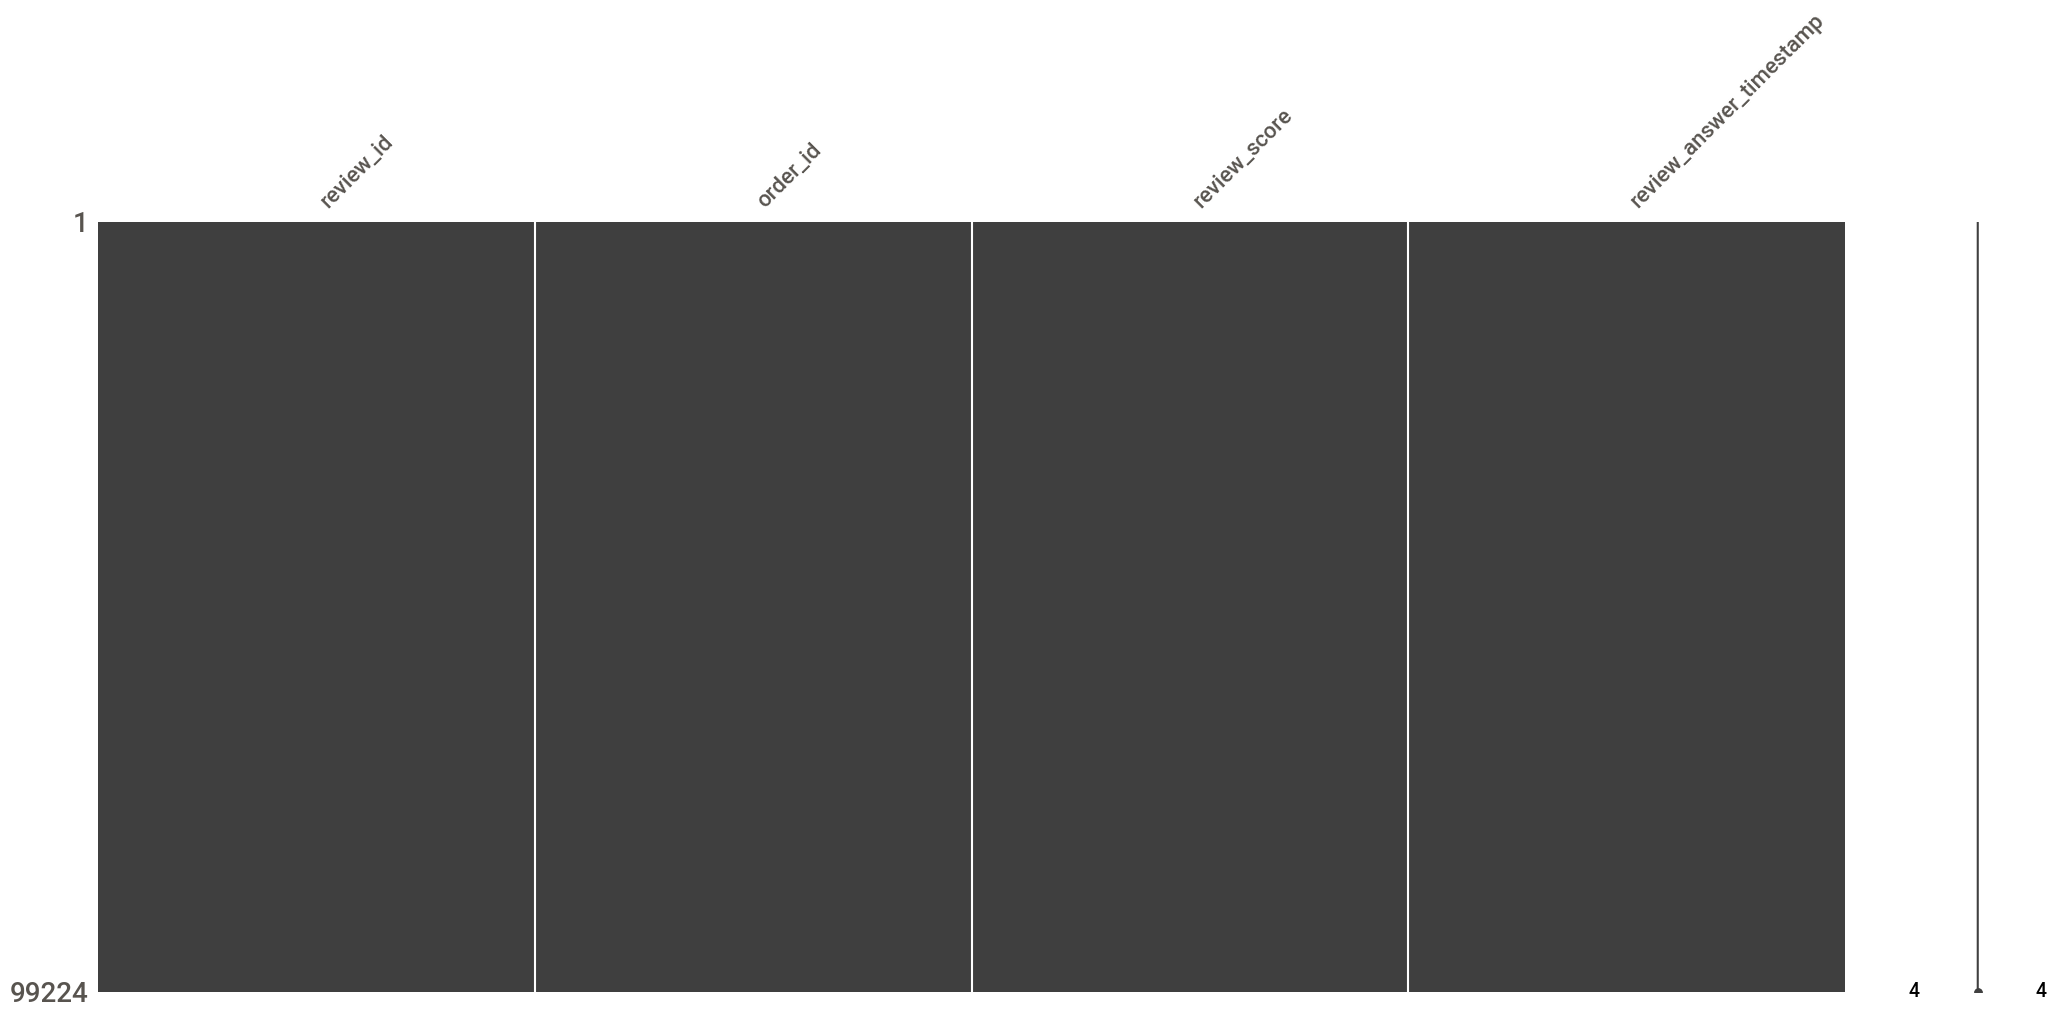

In [182]:
msno.matrix(df_order_reviews)

## Category name translation

In [183]:
df_product_category_name_translation= pd.read_csv('/home/apprenant/Documents/DATA/non_supervise/product_category_name_translation.csv')

In [184]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<AxesSubplot:>

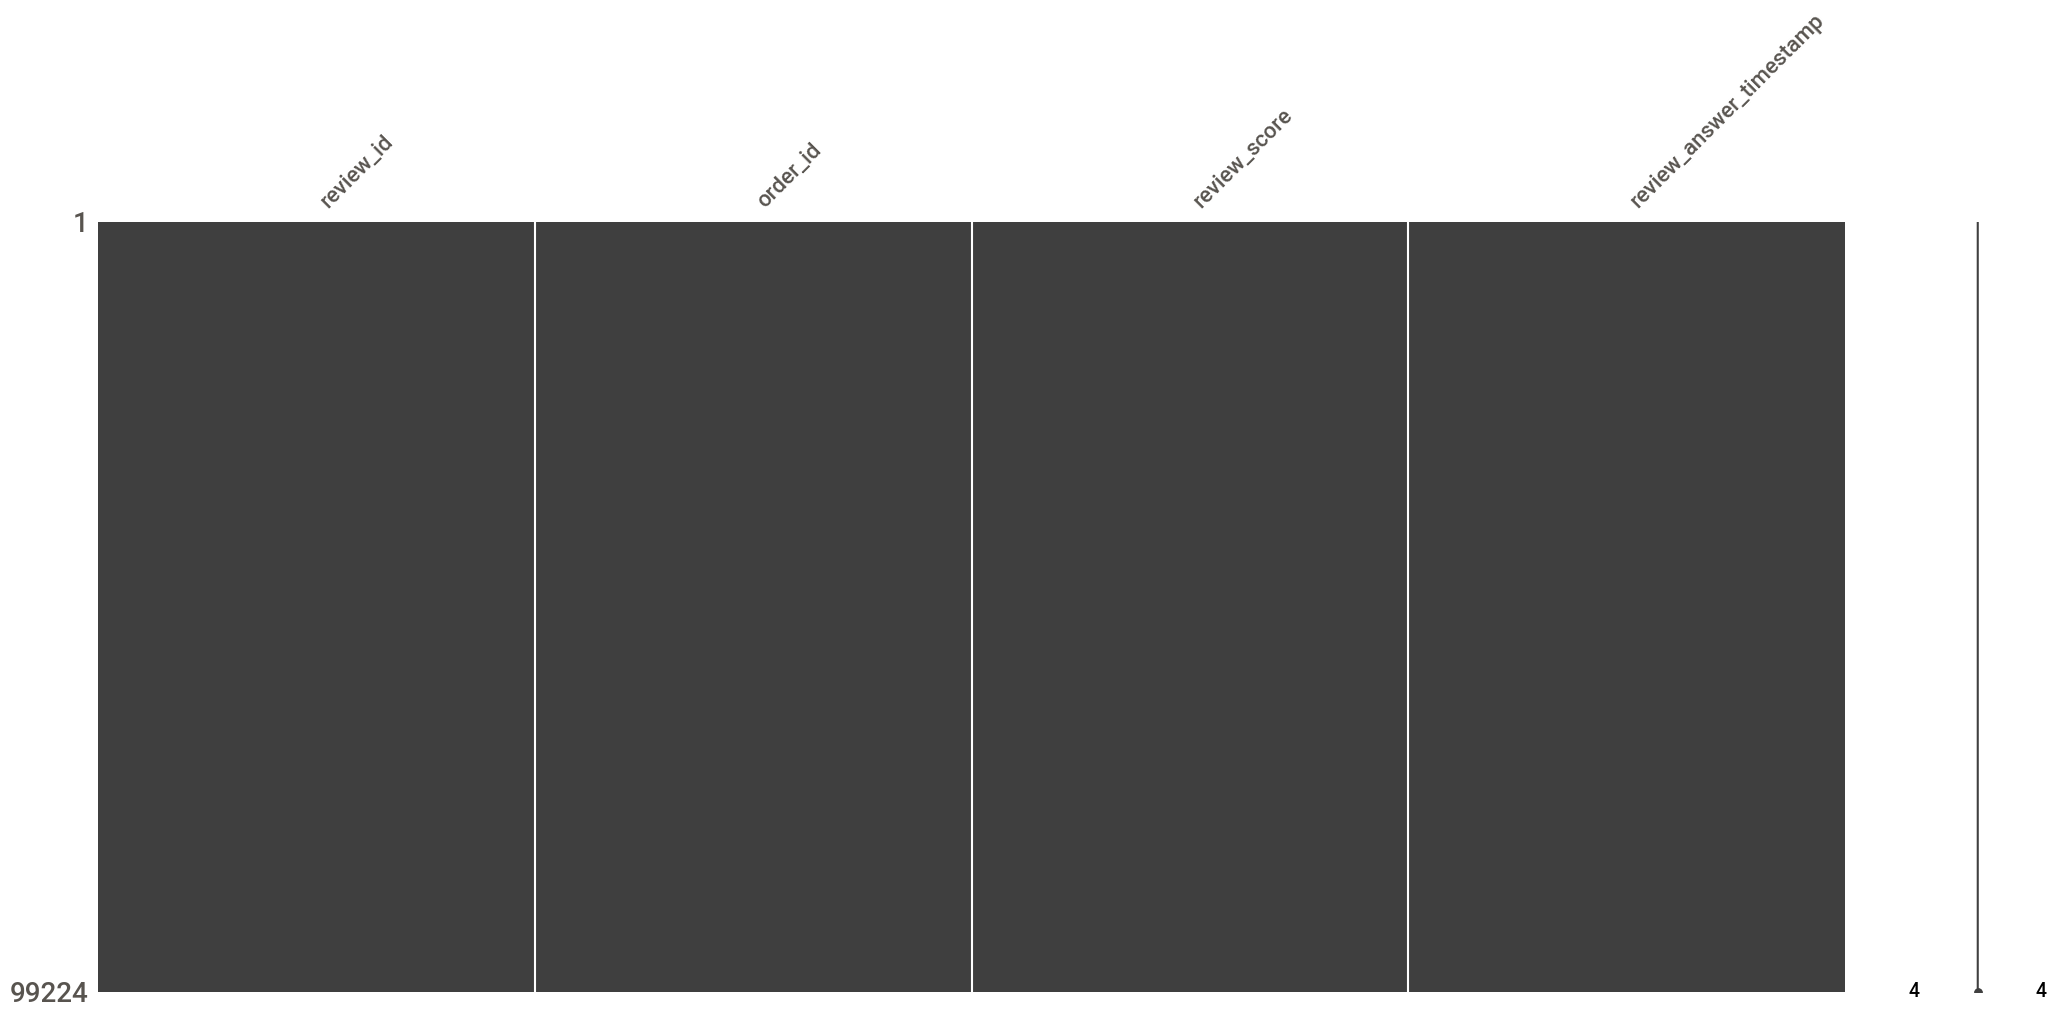

In [185]:
msno.matrix(df_order_reviews)

## Remplacement des produits par catégories en anglais

In [186]:
# Joindre les deux tableaux de données
df_order_products = pd.merge(df_order_products, df_product_category_name_translation, on='product_category_name')

# Remplacer les valeurs dans la colonne 'product_category_name'
df_order_products['product_category_name'] = df_order_products['product_category_name_english']

# Supprimer la colonne inutile
df_order_products.drop('product_category_name_english', axis=1, inplace=True)

print(df_order_products)

                             product_id              product_category_name
0      1e9e8ef04dbcff4541ed26657ea517e5                          perfumery
1      6a2fb4dd53d2cdb88e0432f1284a004c                          perfumery
2      0d009643171aee696f4733340bc2fdd0                          perfumery
3      b1eae565a61935e0011ee7682fef9dc9                          perfumery
4      8da90b37f0fb171b4877c124f965b1f6                          perfumery
...                                 ...                                ...
32323  13b25797ad1e6d6c7cd3cbeb35f8ee7a  furniture_mattress_and_upholstery
32324  dc36a7859b743d8610a2bbbaea26ece9  furniture_mattress_and_upholstery
32325  107fde0930956120d1e13dd1062fbb46  furniture_mattress_and_upholstery
32326  726b4e18f00255e2e63491bcba3f60b8  furniture_mattress_and_upholstery
32327  1dceebcc5f23c02ea23e16d5bedca000                  cds_dvds_musicals

[32328 rows x 2 columns]


# Merger les Dataframes entre eux

In [187]:
df_merged_final = pd.merge(df_customer, df_order, left_on='customer_id', right_on='customer_id', how='left')

In [188]:
df_merged_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,frequency,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,1,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,SP,1,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,SP,1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,SP,1,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,SP,1,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00


In [189]:
df_merged_final.shape

(99441, 10)

<AxesSubplot:>

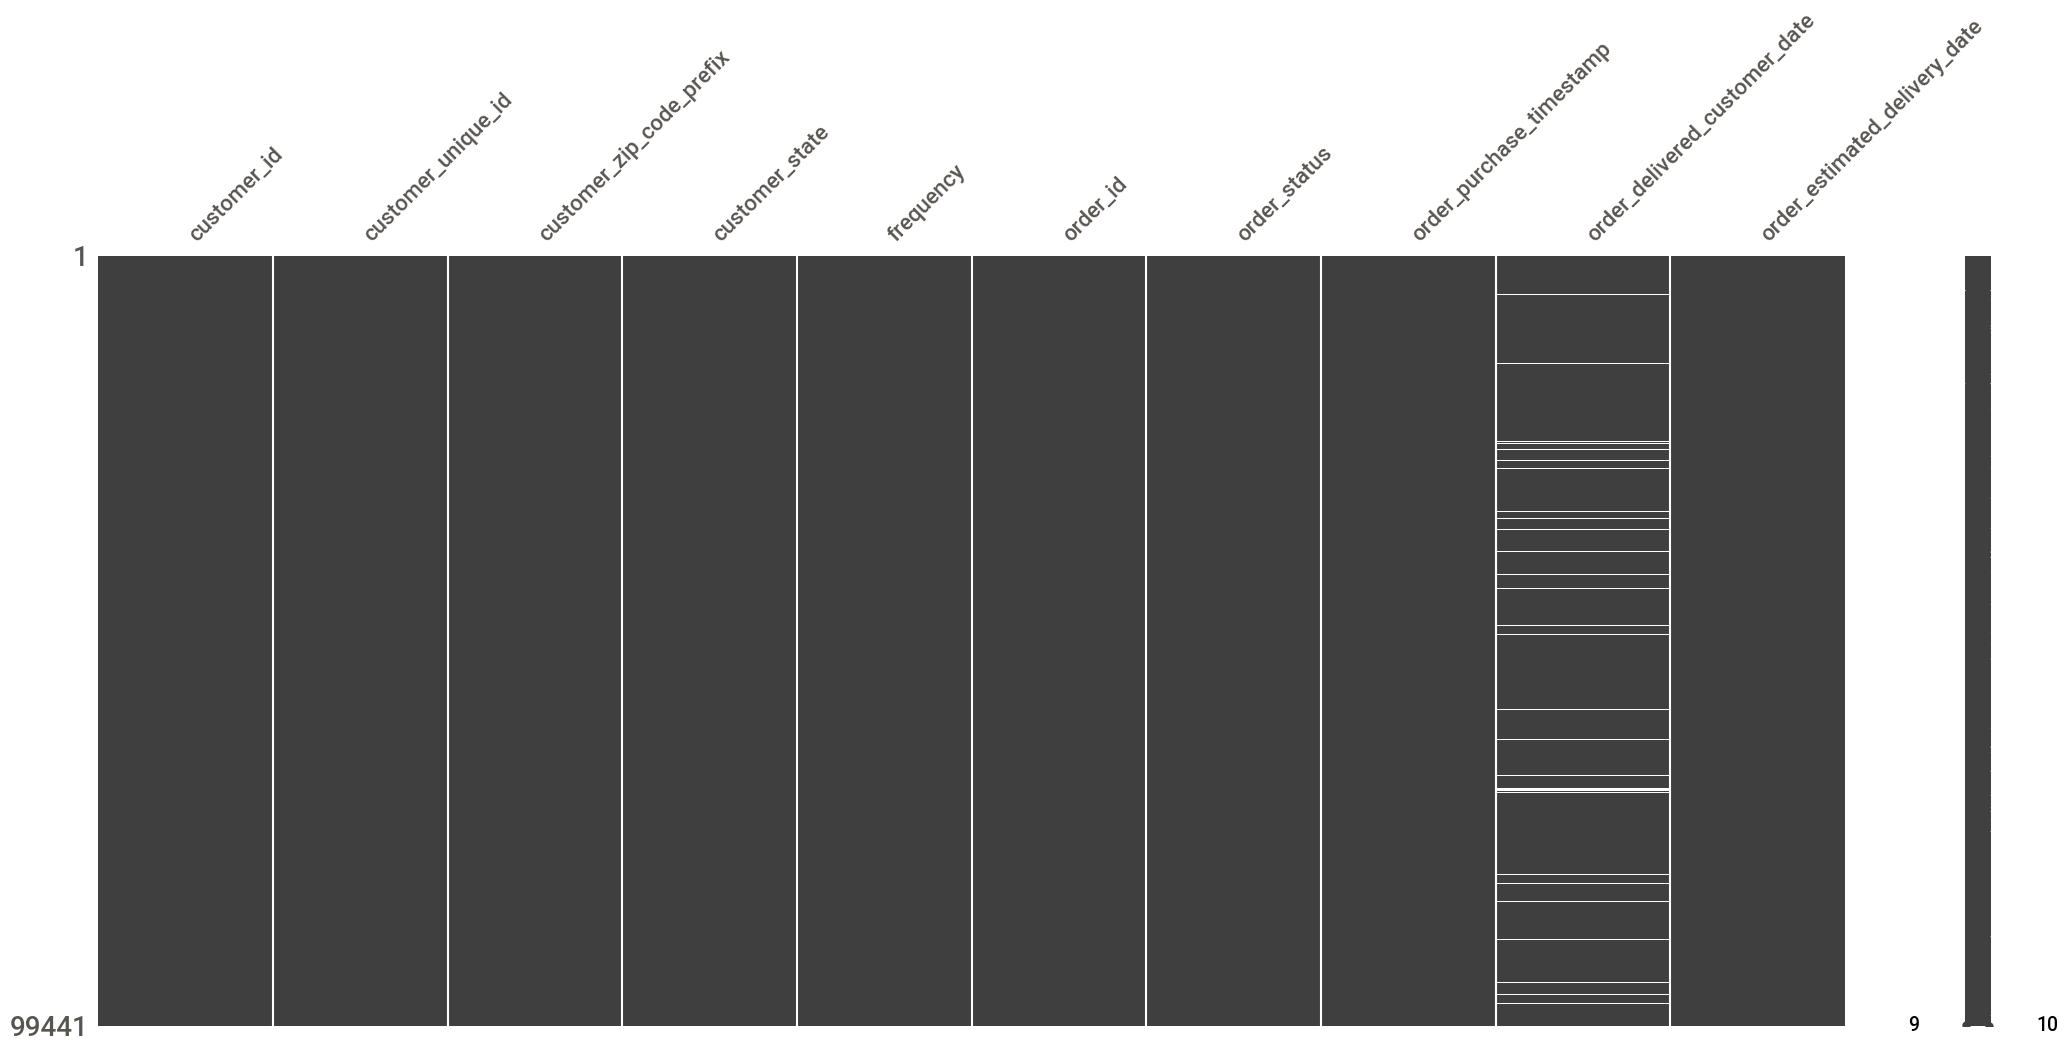

In [190]:
msno.matrix(df_merged_final)

In [191]:
df_merged_final = pd.merge(df_merged_final, df_order_payements, how='left', on='order_id')

In [192]:
df_merged_final.shape

(103887, 13)

<AxesSubplot:>

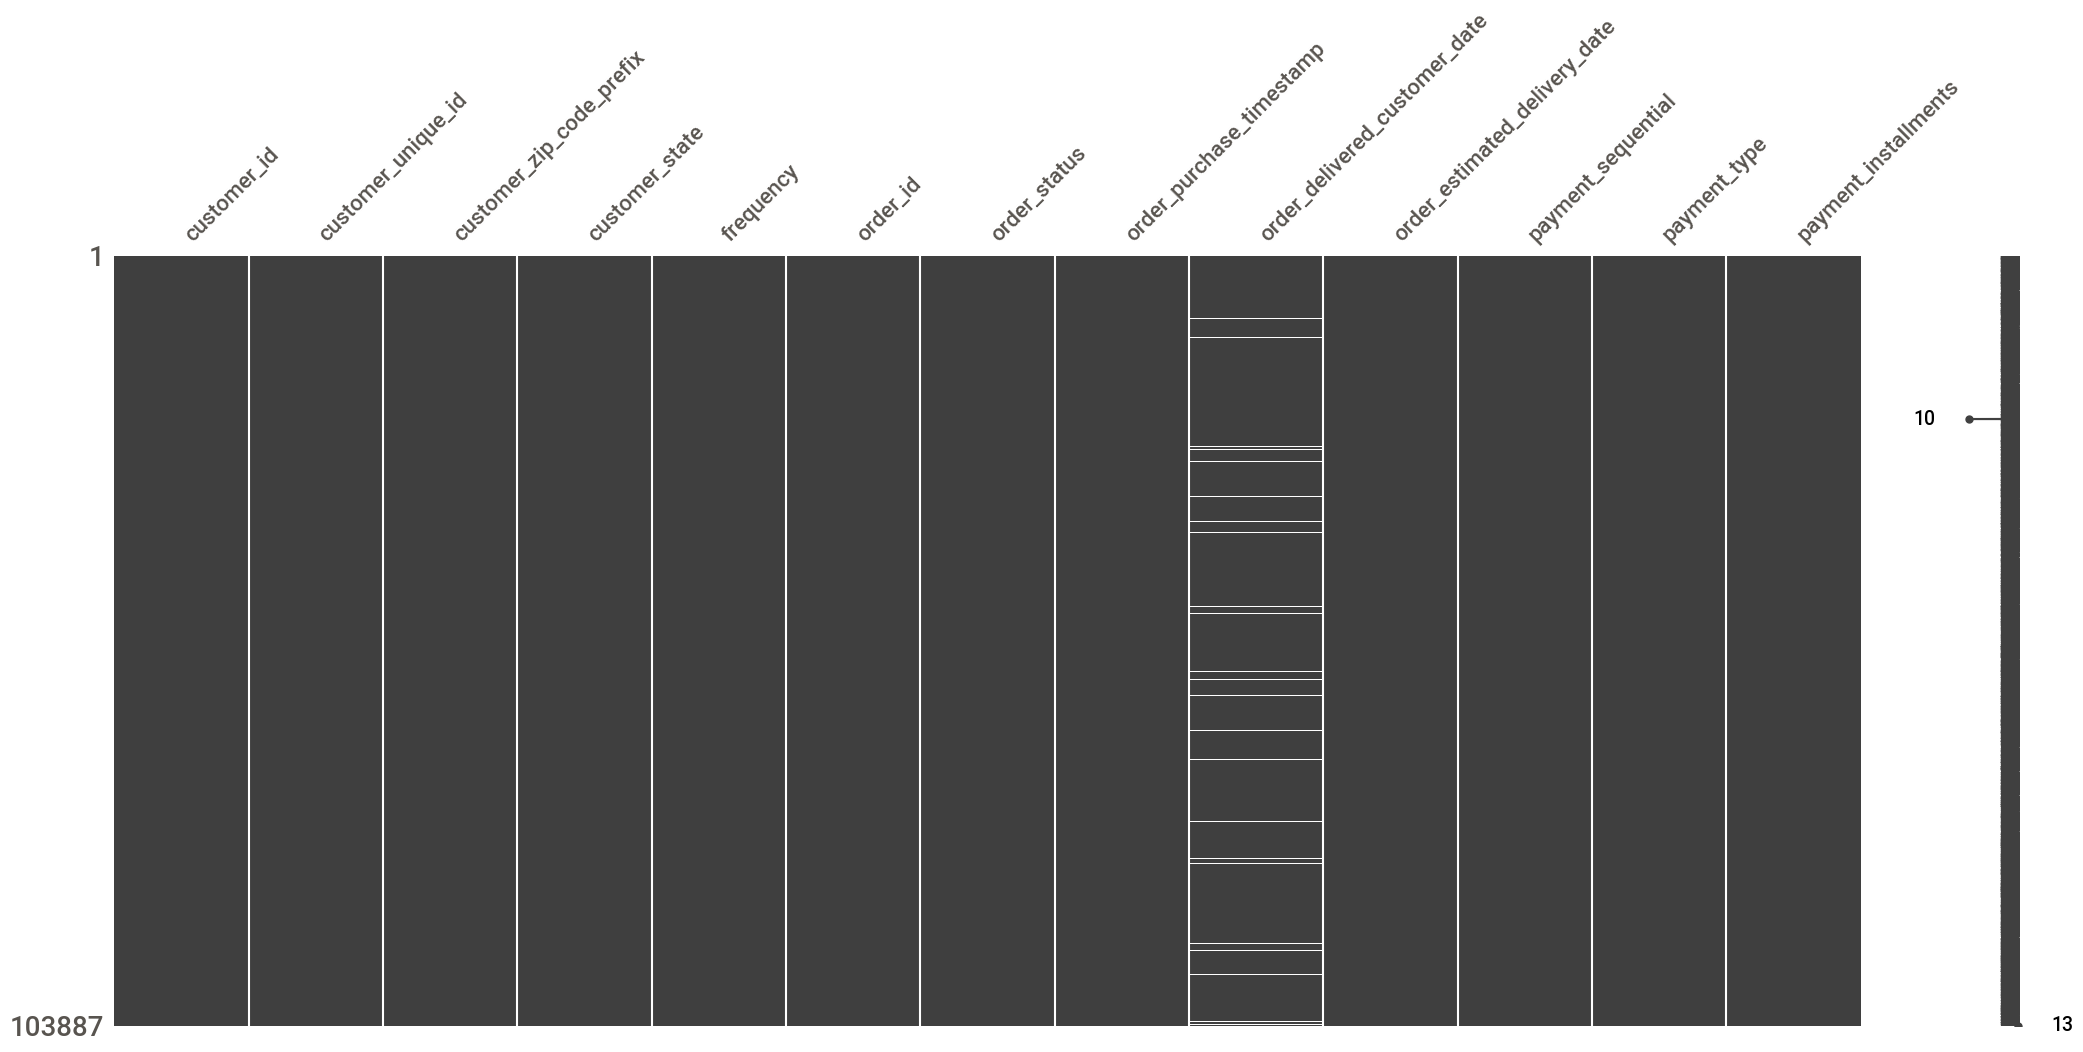

In [193]:
msno.matrix(df_merged_final)

In [194]:
df_merged_final = pd.merge(df_merged_final, df_order_items, left_on='order_id', right_on='order_id', how='left')

In [195]:
df_merged_final.shape

(118434, 18)

<AxesSubplot:>

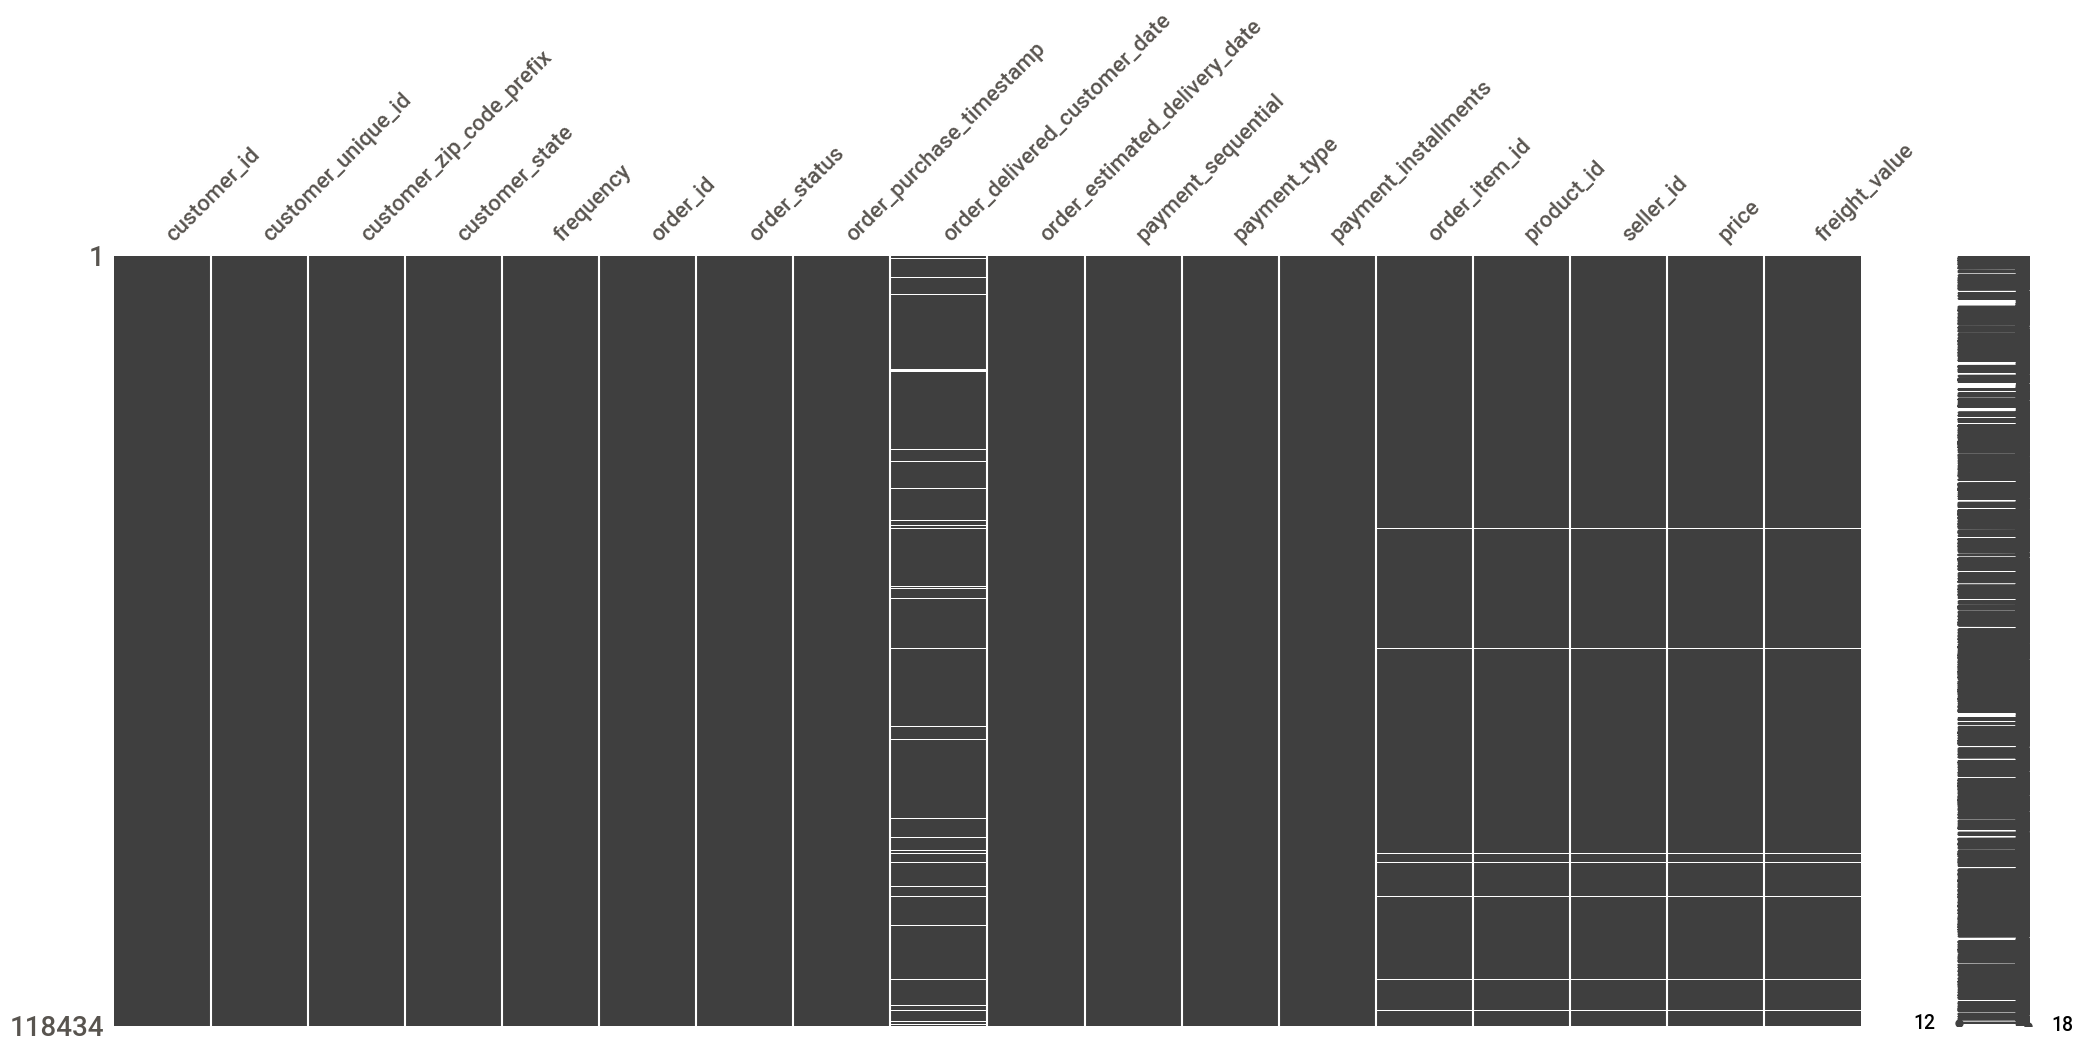

In [196]:
msno.matrix(df_merged_final)

In [197]:
df_merged_final = pd.merge(df_merged_final, df_order_reviews, left_on='order_id', right_on='order_id', how='left')

In [198]:
df_merged_final.shape

(119143, 21)

<AxesSubplot:>

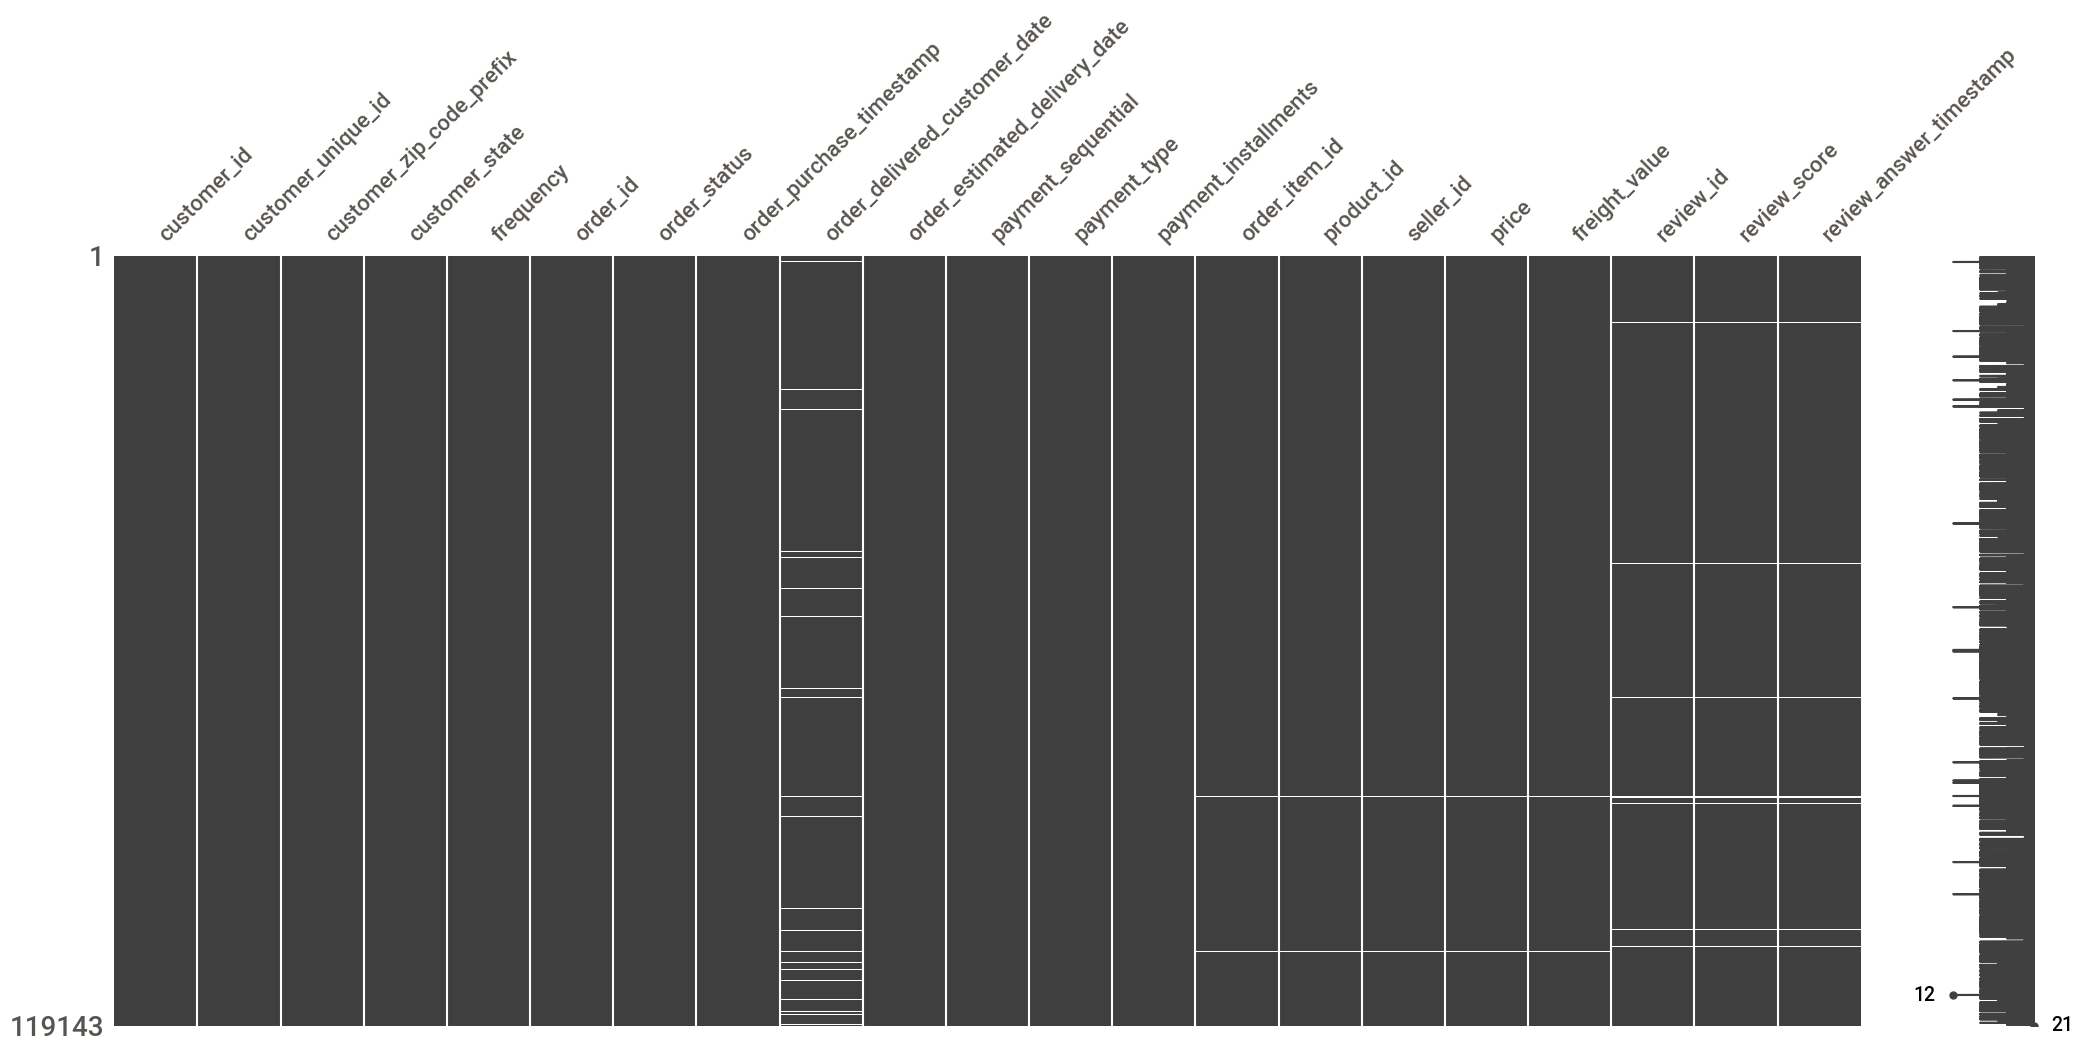

In [199]:
msno.matrix(df_merged_final)

In [200]:
df_merged_final = pd.merge(df_merged_final, df_order_products, left_on='product_id', right_on='product_id', how='left')

In [201]:
df_merged_final.shape

(119143, 22)

<AxesSubplot:>

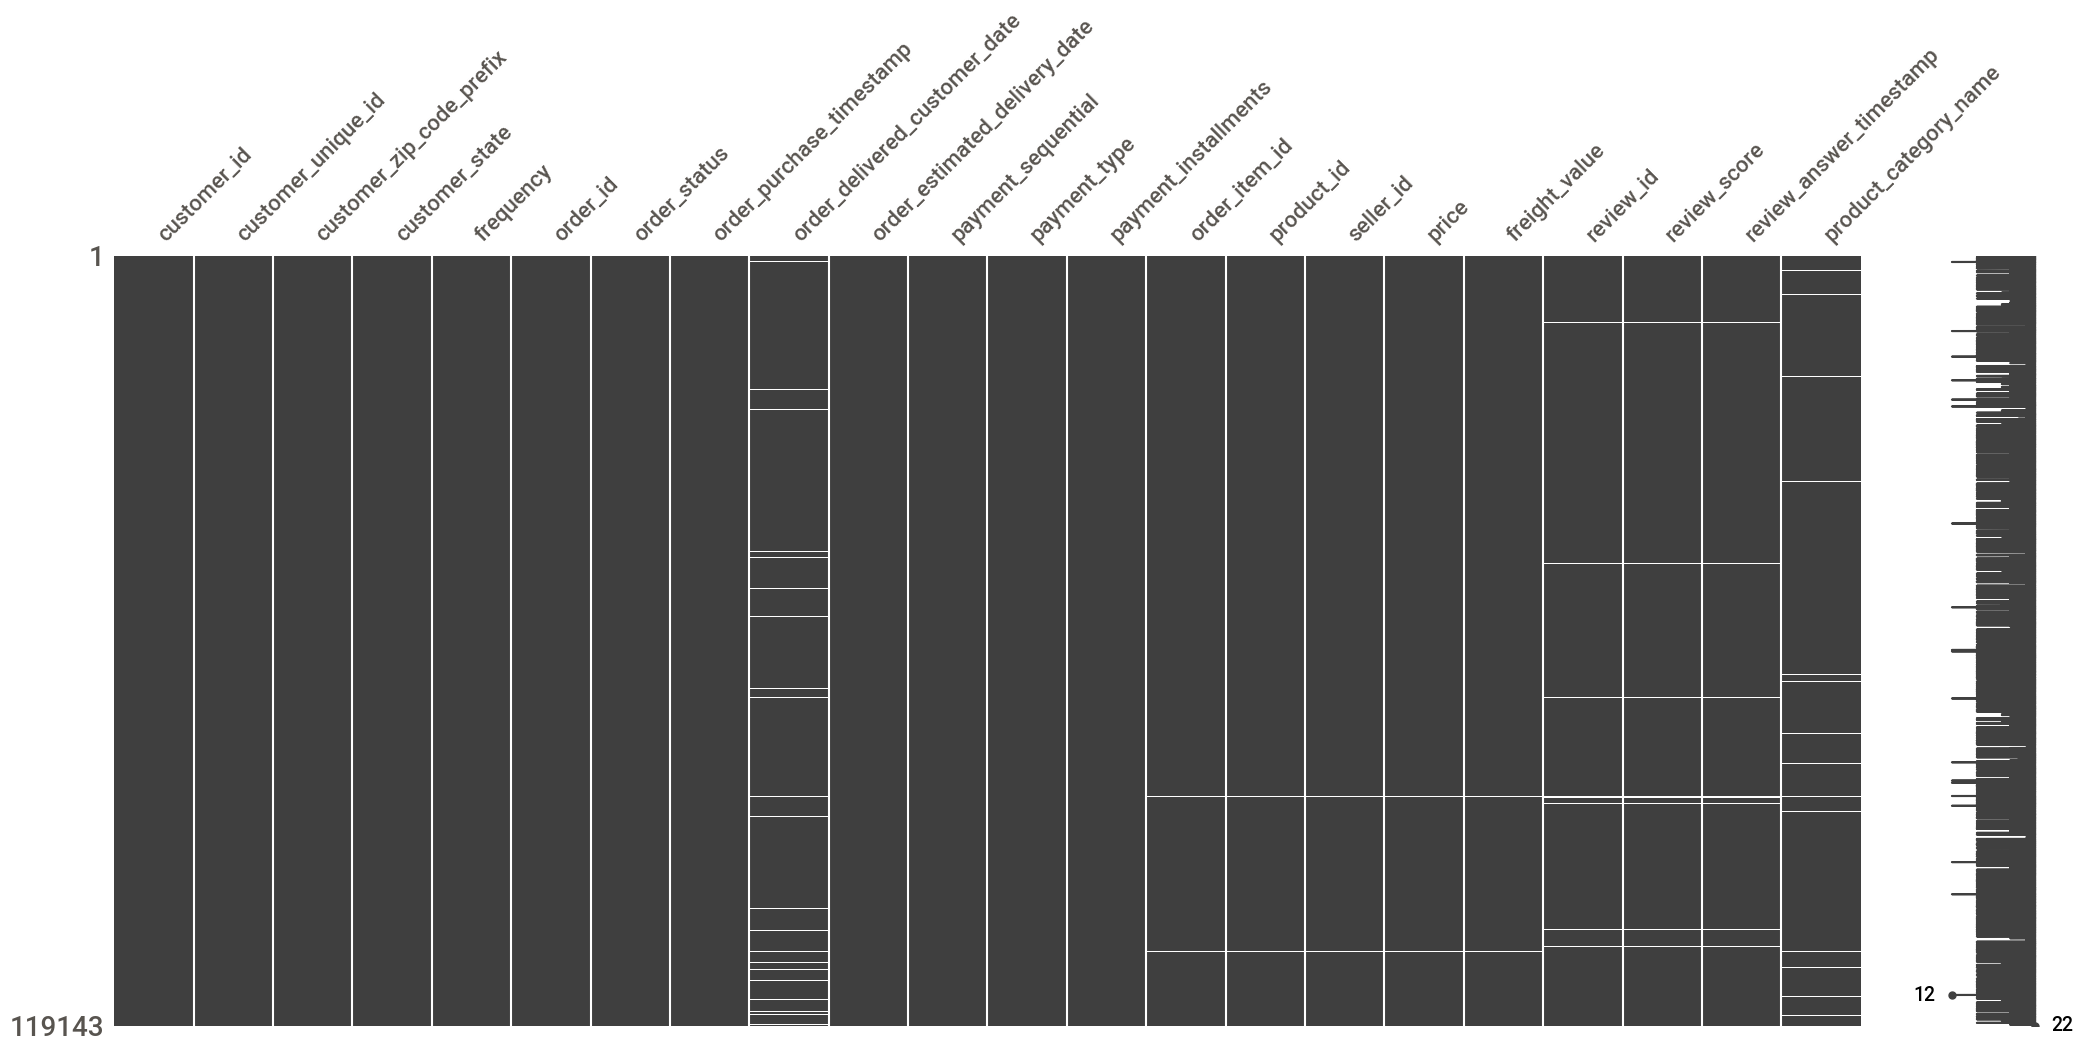

In [202]:
msno.matrix(df_merged_final)

In [203]:
df_merged_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_state', 'frequency', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'order_item_id', 'product_id', 'seller_id',
       'price', 'freight_value', 'review_id', 'review_score',
       'review_answer_timestamp', 'product_category_name'],
      dtype='object')

In [204]:
df_merged_final = pd.merge(df_merged_final, df_sellers, left_on='seller_id', right_on='seller_id', how='left')

In [205]:
df_merged_final.shape

(119143, 25)

<AxesSubplot:>

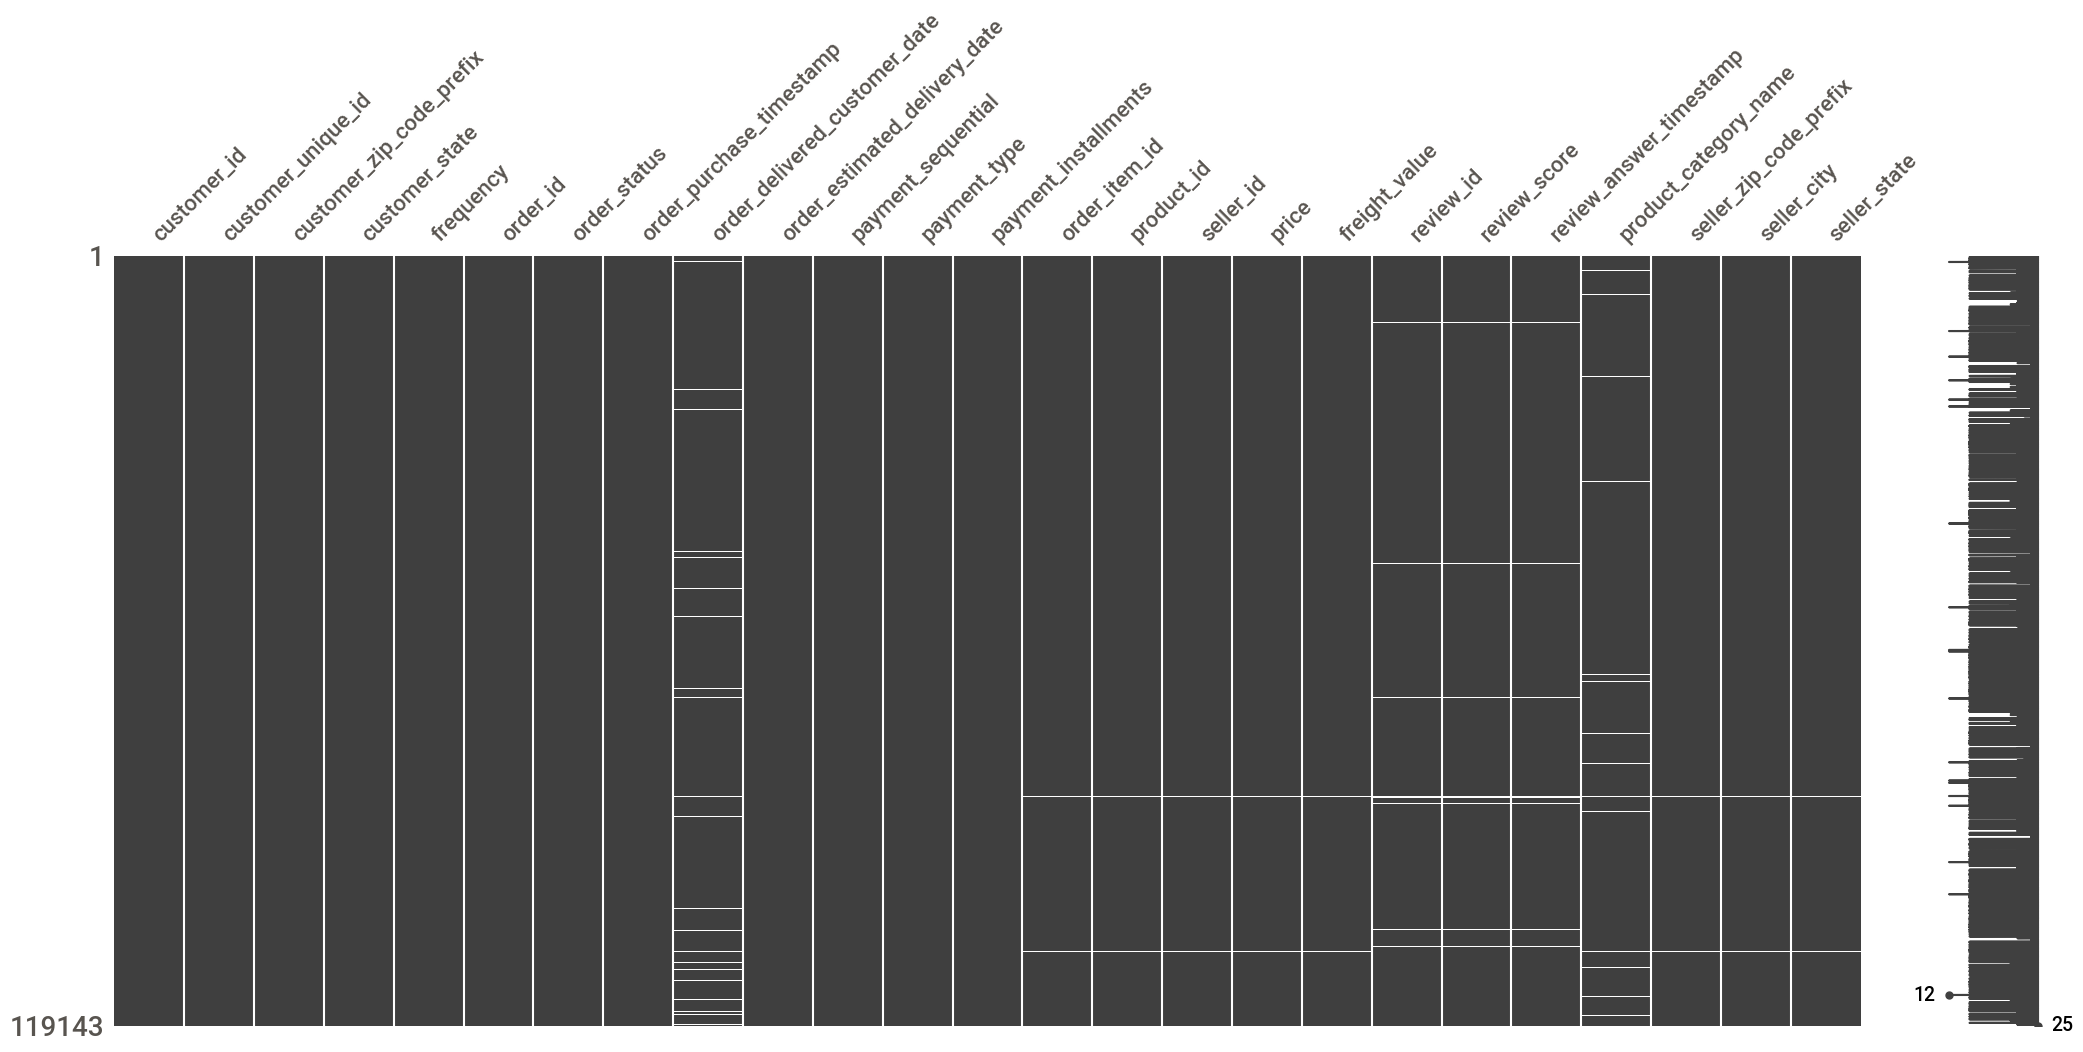

In [206]:
msno.matrix(df_merged_final)

In [207]:
df_merged_final["order_status"].value_counts()


delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: order_status, dtype: int64

In [208]:
columns_to_drop = ['customer_id',"review_id",'seller_city',"seller_id","order_id",'order_item_id','product_id','seller_zip_code_prefix',	'customer_zip_code_prefix']
df_merged_final = df_merged_final.drop(columns=columns_to_drop)

In [209]:
df_merged_final["product_category_name"].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

In [210]:
# Create the mapping dictionary
mapping = {
    'office_furniture': 'furniture',
    'housewares': 'home_goods',
    'home_confort': 'home_goods',
    'furniture_decor': 'furniture',
    'garden_tools': 'home_goods',
    'bed_bath_table': 'home_goods',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'construction_tools_lights': 'construction_tools',
    'cool_stuff': 'misc',
    'home_construction': 'construction_tools',
    'costruction_tools_tools': 'construction_tools',
    'construction_tools_construction': 'construction_tools',
    'costruction_tools_garden': 'construction_tools',
    'furniture_living_room': 'furniture',
    'furniture_bedroom': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'christmas_supplies': 'holiday_goods',
    'agro_industry_and_commerce': 'industry_commerce',
    'industry_commerce_and_business': 'industry_commerce',
    'music': 'entertainment',
    'cds_dvds_musicals': 'entertainment',
    'dvds_blu_ray': 'entertainment',
    'cine_photo': 'electronics',
    'party_supplies': 'misc',
    'arts_and_craftmanship': 'crafts',
    'diapers_and_hygiene': 'baby_goods',
    'flowers': 'misc',
    'la_cuisine': 'kitchen_goods',
}

# Use the mapping dictionary to group similar categories
df_merged_final['product_category_name'] = df_merged_final['product_category_name'].map(mapping)

# Fill in any remaining NaN values with 'other'
df_merged_final['product_category_name'].fillna('other', inplace=True)

# View the unique categories
print(df_merged_final['product_category_name'].unique())


['furniture' 'home_goods' 'other' 'construction_tools' 'misc'
 'entertainment' 'industry_commerce' 'holiday_goods' 'kitchen_goods'
 'baby_goods' 'electronics' 'crafts']


In [211]:
df_merged_final.shape

(119143, 16)

In [212]:
# report = sv.analyze(df_merged_final)
# report.show_html('report_final.html')

In [213]:
df_merged_final.columns

Index(['customer_unique_id', 'customer_state', 'frequency', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'price', 'freight_value', 'review_score',
       'review_answer_timestamp', 'product_category_name', 'seller_state'],
      dtype='object')

In [214]:
df_merged_final.head()

,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,price,freight_value,review_score,review_answer_timestamp,product_category_name,seller_state
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,124.99,21.88,4.0,2017-05-30,furniture,SP
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,289.00,46.48,5.0,2018-02-10,home_goods,SC
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,139.94,17.79,5.0,2018-06-15,furniture,SP
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,149.94,23.36,5.0,2018-04-02,furniture,SP
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,230.00,22.25,5.0,2018-08-17,home_goods,SP


In [215]:
df_merged_final["same_region"] = df_merged_final["customer_state"] == df_merged_final["seller_state"]


In [216]:
df_merged_final

,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,price,freight_value,review_score,review_answer_timestamp,product_category_name,seller_state,same_region
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,124.99,21.88,4.0,2017-05-30,furniture,SP,True
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,289.00,46.48,5.0,2018-02-10,home_goods,SC,False
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,139.94,17.79,5.0,2018-06-15,furniture,SP,True
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,149.94,23.36,5.0,2018-04-02,furniture,SP,True
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,230.00,22.25,5.0,2018-08-17,home_goods,SP,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,credit_card,6.0,74.90,13.88,4.0,2018-04-28,other,SP,True
119139,d52a67c98be1cf6a5c84435bd38d095d,SP,1,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20 00:00:00,1.0,credit_card,3.0,114.90,14.16,5.0,2018-04-16,other,SP,True
119140,e9f50caf99f032f0bf3c55141f019d99,CE,1,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02 00:00:00,1.0,credit_card,5.0,37.00,19.04,1.0,2018-05-08,other,SP,False
119141,73c2643a0a458b49f58cea58833b192e,RS,1,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05 00:00:00,1.0,credit_card,2.0,689.00,22.07,5.0,2017-11-19,other,SP,False


In [217]:
df_merged_final['order_purchase_timestamp'] = pd.to_datetime(df_merged_final['order_purchase_timestamp'])
df_merged_final['order_delivered_customer_date'] = pd.to_datetime(df_merged_final['order_delivered_customer_date'])
df_merged_final['order_estimated_delivery_date'] = pd.to_datetime(df_merged_final['order_estimated_delivery_date'])


In [218]:

df_merged_final['delivery_delay'] = (df_merged_final['order_delivered_customer_date'] - df_merged_final['order_estimated_delivery_date']).dt.total_seconds()
df_merged_final['on_time_delivery'] = df_merged_final['delivery_delay'] <= 0
df_merged_final['delivery_time'] = (df_merged_final['order_delivered_customer_date'] - df_merged_final['order_purchase_timestamp']).dt.total_seconds()



In [219]:

df_merged_final['delivery_time'] = round(df_merged_final['delivery_time'] / 86400)
df_merged_final['delivery_delay'] = round(df_merged_final['delivery_delay'] / 86400)



In [220]:
df_merged_final

,customer_unique_id,customer_state,frequency,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,price,freight_value,review_score,review_answer_timestamp,product_category_name,seller_state,same_region,delivery_delay,on_time_delivery,delivery_time
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,124.99,21.88,4.0,2017-05-30,furniture,SP,True,-11.0,True,9.0
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,289.00,46.48,5.0,2018-02-10,home_goods,SC,False,-7.0,True,17.0
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,139.94,17.79,5.0,2018-06-15,furniture,SP,True,2.0,False,26.0
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,149.94,23.36,5.0,2018-04-02,furniture,SP,True,-12.0,True,15.0
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,230.00,22.25,5.0,2018-08-17,home_goods,SP,True,-5.0,True,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,74.90,13.88,4.0,2018-04-28,other,SP,True,-11.0,True,6.0
119139,d52a67c98be1cf6a5c84435bd38d095d,SP,1,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20,1.0,credit_card,3.0,114.90,14.16,5.0,2018-04-16,other,SP,True,-8.0,True,7.0
119140,e9f50caf99f032f0bf3c55141f019d99,CE,1,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02,1.0,credit_card,5.0,37.00,19.04,1.0,2018-05-08,other,SP,False,8.0,False,31.0
119141,73c2643a0a458b49f58cea58833b192e,RS,1,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05,1.0,credit_card,2.0,689.00,22.07,5.0,2017-11-19,other,SP,False,-18.0,True,13.0


In [221]:
df_merged_final["order_status"].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

In [222]:
columns_to_drop = [ "order_purchase_timestamp","order_delivered_customer_date","order_estimated_delivery_date","review_answer_timestamp","seller_state"]
df_merged_final = df_merged_final.drop(columns = columns_to_drop)

In [223]:
df_merged_final.head()

,customer_unique_id,customer_state,frequency,order_status,payment_sequential,payment_type,payment_installments,price,freight_value,review_score,product_category_name,same_region,delivery_delay,on_time_delivery,delivery_time
0,861eff4711a542e4b93843c6dd7febb0,SP,1,delivered,1.0,credit_card,2.0,124.99,21.88,4.0,furniture,True,-11.0,True,9.0
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,delivered,1.0,credit_card,8.0,289.00,46.48,5.0,home_goods,False,-7.0,True,17.0
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,delivered,1.0,credit_card,7.0,139.94,17.79,5.0,furniture,True,2.0,False,26.0
3,259dac757896d24d7702b9acbbff3f3c,SP,1,delivered,1.0,credit_card,1.0,149.94,23.36,5.0,furniture,True,-12.0,True,15.0
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,delivered,1.0,credit_card,8.0,230.00,22.25,5.0,home_goods,True,-5.0,True,11.0


In [224]:
df_merged_final["customer_unique_id"].value_counts()


9a736b248f67d166d2fbb006bcb877c3    75
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
                                    ..
5e809f39163aadeda694b51606b02d49     1
368ad1cd5eb8e06bb9b4cae407bb4bf2     1
302c1a15f1ada723f22801b30293cde3     1
2880d08cd241936c6ce9a1f916ed30fe     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [225]:
df_merged_final.shape

(119143, 15)

In [226]:


# calculer la fréquence de chaque valeur unique dans la colonne 'col1'
total_object = df_merged_final['customer_unique_id'].value_counts()

# ajouter la fréquence en tant que nouvelle colonne au DataFrame
df_merged_final['total_object'] = df_merged_final['customer_unique_id'].map(total_object)




In [227]:
mask = df_merged_final["customer_unique_id"] == '9a736b248f67d166d2fbb006bcb877c3' 
df_merged_final[mask]


,customer_unique_id,customer_state,frequency,order_status,payment_sequential,payment_type,payment_installments,price,freight_value,review_score,product_category_name,same_region,delivery_delay,on_time_delivery,delivery_time,total_object
22435,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,17.0,voucher,1.0,12.99,23.21,5.0,home_goods,False,-15.0,True,6.0,75
22436,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,17.0,voucher,1.0,12.99,23.21,5.0,home_goods,False,-15.0,True,6.0,75
22437,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,17.0,voucher,1.0,83.80,5.12,5.0,home_goods,False,-15.0,True,6.0,75
22438,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,1.0,voucher,1.0,12.99,23.21,5.0,home_goods,False,-15.0,True,6.0,75
22439,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,1.0,voucher,1.0,12.99,23.21,5.0,home_goods,False,-15.0,True,6.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93475,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,3.0,voucher,1.0,45.20,26.97,5.0,furniture,True,-14.0,True,5.0,75
93476,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,5.0,voucher,1.0,45.20,26.97,5.0,furniture,True,-14.0,True,5.0,75
93477,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,4.0,voucher,1.0,45.20,26.97,5.0,furniture,True,-14.0,True,5.0,75
93478,9a736b248f67d166d2fbb006bcb877c3,SP,2,delivered,12.0,voucher,1.0,45.20,26.97,5.0,furniture,True,-14.0,True,5.0,75


In [228]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_unique_id     119143 non-null  object 
 1   customer_state         119143 non-null  object 
 2   frequency              119143 non-null  int64  
 3   order_status           119143 non-null  object 
 4   payment_sequential     119140 non-null  float64
 5   payment_type           119140 non-null  object 
 6   payment_installments   119140 non-null  float64
 7   price                  118310 non-null  float64
 8   freight_value          118310 non-null  float64
 9   review_score           118146 non-null  float64
 10  product_category_name  119143 non-null  object 
 11  same_region            119143 non-null  bool   
 12  delivery_delay         115722 non-null  float64
 13  on_time_delivery       119143 non-null  bool   
 14  delivery_time          115722 non-nu

In [229]:
df_merged_final.shape

(119143, 16)

In [230]:
missing_values_count = df_merged_final.isnull().sum()
missing_values_count

customer_unique_id          0
customer_state              0
frequency                   0
order_status                0
payment_sequential          3
payment_type                3
payment_installments        3
price                     833
freight_value             833
review_score              997
product_category_name       0
same_region                 0
delivery_delay           3421
on_time_delivery            0
delivery_time            3421
total_object                0
dtype: int64

In [231]:
df_merged_final.dropna(inplace=True)


In [232]:
df_merged_final.shape

(114858, 16)

In [233]:
agg_dict = {}

for col in df_merged_final.columns:
    if df_merged_final[col].dtype == 'object' or df_merged_final[col].dtype == 'bool':
        agg_dict[col] = lambda x: x.value_counts().index[0]
    elif df_merged_final[col].dtype == 'float64' or df_merged_final[col].dtype == 'int64':
        agg_dict[col] = 'mean'

grouped_df = df_merged_final.groupby(by='customer_unique_id').agg(agg_dict)



In [234]:
grouped_df.head()

,customer_unique_id,customer_state,frequency,order_status,payment_sequential,payment_type,payment_installments,price,freight_value,review_score,product_category_name,same_region,delivery_delay,on_time_delivery,delivery_time,total_object
customer_unique_id,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0000366f3b9a7992bf8c76cfdf3221e2,SP,1.0,delivered,1.0,credit_card,8.0,129.90,12.00,5.0,home_goods,True,-4.0,True,6.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1.0,delivered,1.0,credit_card,1.0,18.90,8.29,4.0,other,True,-4.0,True,3.0,1.0
0000f46a3911fa3c0805444483337064,0000f46a3911fa3c0805444483337064,SC,1.0,delivered,1.0,credit_card,8.0,69.00,17.22,3.0,other,False,-1.0,True,26.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,0000f6ccb0745a6a4b88665a16c9f078,PA,1.0,delivered,1.0,credit_card,4.0,25.99,17.63,4.0,other,False,-11.0,True,20.0,1.0
0004aac84e0df4da2b147fca70cf8255,0004aac84e0df4da2b147fca70cf8255,SP,1.0,delivered,1.0,credit_card,6.0,180.00,16.89,5.0,other,True,-7.0,True,13.0,1.0


In [235]:
grouped_df.shape

(92752, 16)

In [236]:
grouped__df = grouped_df.drop(columns="customer_unique_id")

In [237]:
df_merged_final.shape

(114858, 16)

In [238]:
grouped_df["order_status"].value_counts()

delivered    92746
canceled         6
Name: order_status, dtype: int64

In [239]:
missing_values_count = grouped_df.isnull().sum()
missing_values_count

customer_unique_id       0
customer_state           0
frequency                0
order_status             0
payment_sequential       0
payment_type             0
payment_installments     0
price                    0
freight_value            0
review_score             0
product_category_name    0
same_region              0
delivery_delay           0
on_time_delivery         0
delivery_time            0
total_object             0
dtype: int64

In [240]:
grouped_df=grouped_df[grouped_df["order_status"]!= "canceled"]

In [252]:
grouped_df

,customer_state,frequency,payment_sequential,payment_type,payment_installments,price,freight_value,review_score,product_category_name,same_region,delivery_delay,on_time_delivery,delivery_time,total_object
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,1.0,1.0,credit_card,8.0,129.90,12.00,5.0,home_goods,True,-4.0,True,6.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1.0,1.0,credit_card,1.0,18.90,8.29,4.0,other,True,-4.0,True,3.0,1.0
0000f46a3911fa3c0805444483337064,SC,1.0,1.0,credit_card,8.0,69.00,17.22,3.0,other,False,-1.0,True,26.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,PA,1.0,1.0,credit_card,4.0,25.99,17.63,4.0,other,False,-11.0,True,20.0,1.0
0004aac84e0df4da2b147fca70cf8255,SP,1.0,1.0,credit_card,6.0,180.00,16.89,5.0,other,True,-7.0,True,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,PE,1.0,1.0,credit_card,10.0,785.00,248.71,5.0,other,False,-27.0,True,28.0,2.0
fffea47cd6d3cc0a88bd621562a9d061,BA,1.0,1.0,credit_card,1.0,64.89,19.69,4.0,other,False,-2.0,True,30.0,1.0
ffff371b4d645b6ecea244b27531430a,MT,1.0,1.0,credit_card,1.0,89.90,22.56,5.0,other,False,-29.0,True,15.0,1.0


# Modélisation 

In [291]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92746 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_state         92746 non-null  object 
 1   frequency              92746 non-null  float64
 2   payment_sequential     92746 non-null  float64
 3   payment_type           92746 non-null  object 
 4   payment_installments   92746 non-null  float64
 5   price                  92746 non-null  float64
 6   freight_value          92746 non-null  float64
 7   review_score           92746 non-null  float64
 8   product_category_name  92746 non-null  object 
 9   same_region            92746 non-null  bool   
 10  delivery_delay         92746 non-null  float64
 11  on_time_delivery       92746 non-null  bool   
 12  delivery_time          92746 non-null  float64
 13  total_object           92746 non-null  float64
dtypes

In [243]:
grouped_df = grouped_df.drop(columns=["order_status","customer_unique_id"])

In [244]:
columns_categories = ["customer_state",'payment_type','product_category_name', 'same_region','on_time_delivery']
columns_numeric = ['frequency', 'payment_sequential','payment_installments', 'price', 'freight_value', 'review_score','delivery_delay','delivery_time', 'total_object']

In [255]:
df_num= grouped_df[columns_numeric]

## K_means

In [256]:
std = StandardScaler()
df_norm = pd.DataFrame(std.fit_transform(df_num),columns=df_num.columns)



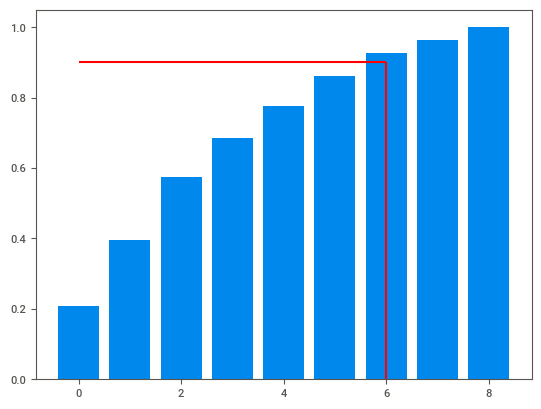

In [293]:
from sklearn.preprocessing import  StandardScaler
import numpy as np
std = StandardScaler()

numeric_features = grouped_df.select_dtypes(include=['float64', 'int64'])
X_train_standard = std.fit_transform(numeric_features)

from sklearn.decomposition import PCA
# Choisir le nb de composants
n_dims = X_train_standard.shape[1]
model = PCA(n_components=n_dims)
model.fit(X_train_standard)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)

import matplotlib.pyplot as plt
plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

In [301]:
# Effectuer une ACP sur les résultats
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(df_norm),columns=["f1","f2"])
X_pca

,f1,f2
0,-0.080334,-0.613489
1,-0.716589,0.074818
2,1.999495,-0.103554
3,0.440968,-0.135097
4,0.232273,-0.574079
...,...,...
92741,5.915202,-3.441733
92742,1.405298,0.196462
92743,-1.143567,-0.497128
92744,-0.316323,-0.559008


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


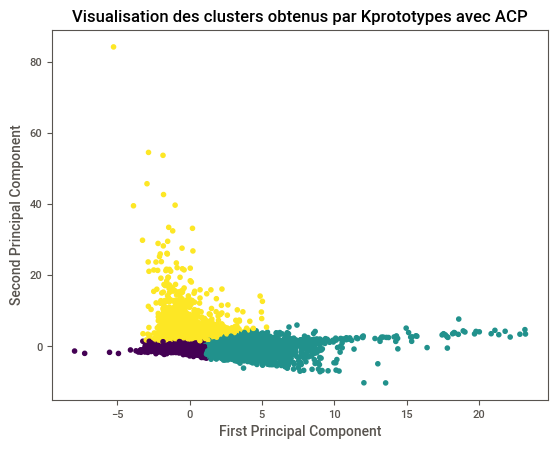

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


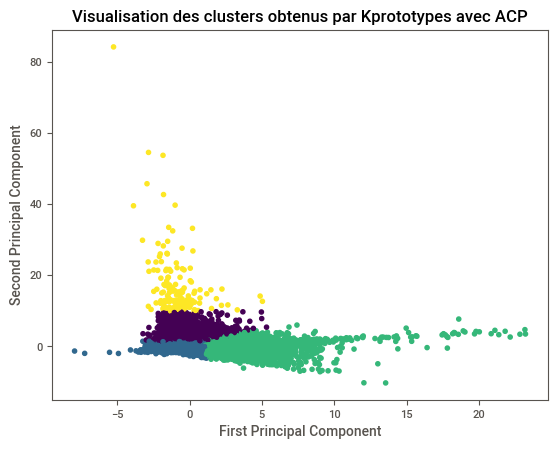

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


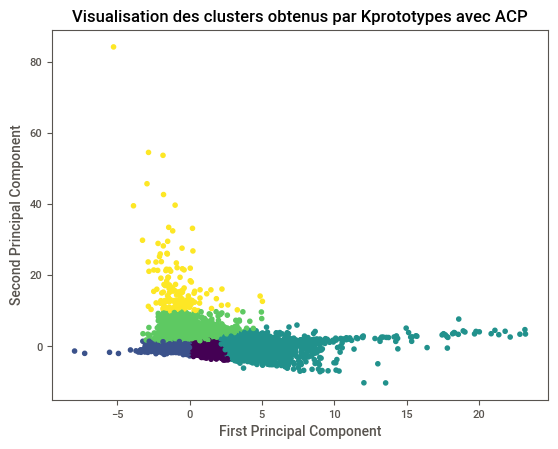

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


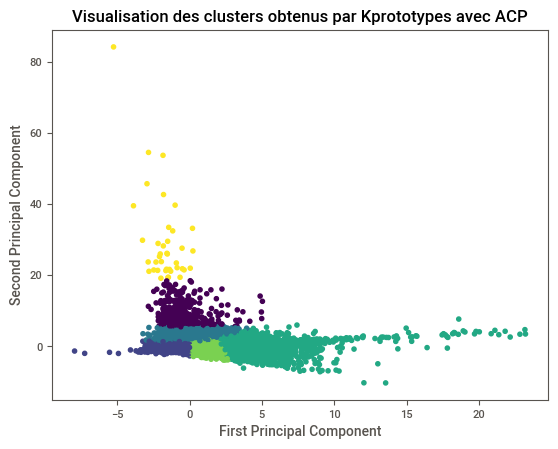

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


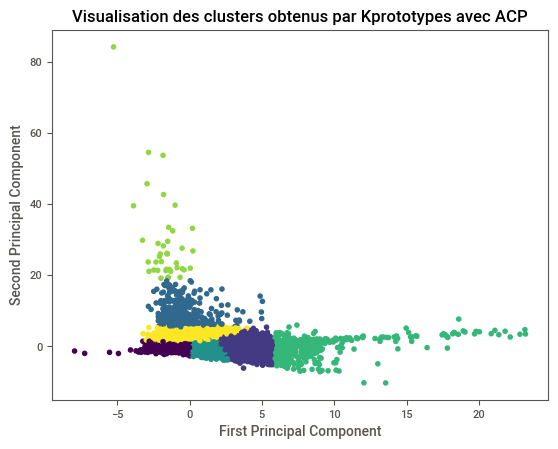

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


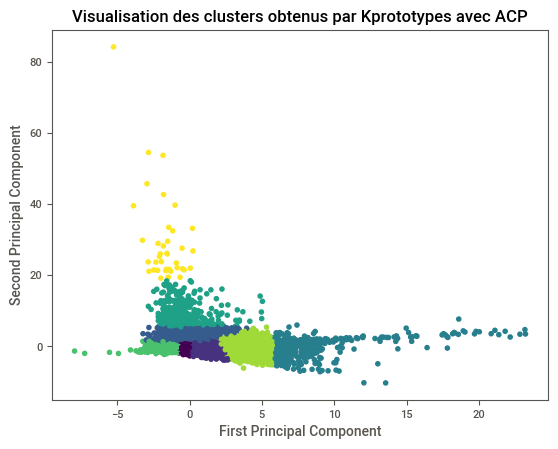

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


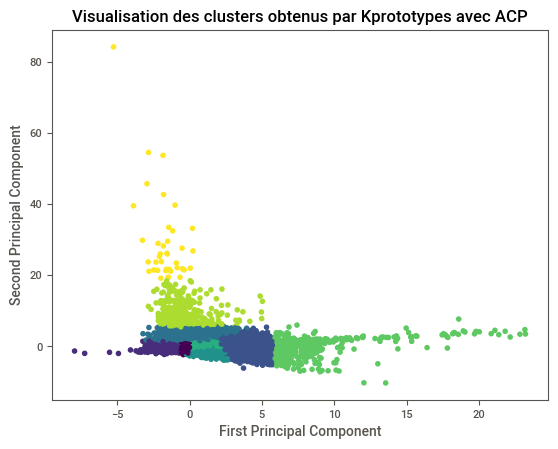

In [302]:
for cluster in range(3, 10):
    kmeans = KMeans( n_clusters = cluster, random_state = 0)
    predict =kmeans.fit_predict(X_pca)
    X_pca["cluster"] = predict 
    plt.scatter(X_pca["f1"], X_pca["f2"], c=X_pca["cluster"])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Visualisation des clusters obtenus par Kprototypes avec ACP')
    plt.show()